# Problem Statement

Schuster, a multinational retailer specializing in sports goods and accessories, maintains extensive credit arrangements with numerous vendors. However, some vendors habitually delay payments, resulting in the imposition of significant late payment fees. This practice, while standard, is not conducive to fostering long-term, mutually beneficial relationships. To mitigate this issue, Schuster seeks to analyze customer payment behavior systematically and predict the likelihood of late payments on outstanding invoices. By doing so, the company aims to optimize its credit management processes, minimize non-value-added activities, and mitigate the financial impact associated with late payments.

# Goal
Schuster aims to enhance its comprehension of customer payment behavior by analyzing past payment patterns, thereby facilitating customer segmentation. Utilizing historical data, the company seeks to forecast the probability of delayed payments for open invoices from its clientele. This predictive insight will enable collectors to strategically prioritize their efforts in proactively engaging with customers to ensure timely payments.

# Approach 

Library Importation and Data Understanding:
Import necessary libraries and comprehensively examine the data to gain insights.

Data Cleaning:
Conduct data quality assessments, including checks for duplicate records, missing values, and outliers.

Data Visualization:
Employ visualizations to depict key patterns and relationships within the dataset.

Customer Segmentation:
Implement segmentation techniques to categorize customers based on their payment behavior.

Data Preparation:
Prepare the data for modeling, addressing any issues related to data imbalance.

Model Building (Logistic Regression):
Develop a logistic regression model and evaluate its performance.

Model Building (Random Forest) and Hyperparameter Tuning:
Construct a random forest model, optimize its hyperparameters, and assess its effectiveness.

Prediction on Test Set:
Utilize the trained models to predict the likelihood of delayed payments on the test set.

Model Deployment:
Deploy the trained model to predict payment delays for open invoices.

Customer Insights on Open Invoices:
Extract actionable insights from the model predictions to prioritize collections efforts effectively.

In [171]:
# importing the necessary libraries
import pandas as pd
import numpy as np
# importing the libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for model
import sklearn
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Setting the display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Reading the file : Open Invoice | Received Payment

In [172]:
# reading the file containing details of payments received
rec_payment=pd.read_csv("Received_Payments_Data.csv")
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [173]:
# Reading the file containing details of open invoices
openinv_data=pd.read_csv("Open_Invoice_data.csv",encoding="ISO-8859-1")
openinv_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [174]:
openinv_data.shape

(88204, 14)

# Data Understanding

In [175]:
rec_payment.shape

(93937, 16)

In [176]:
#Check for Missing Value
rec_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [177]:
#Check Unique Records
rec_payment.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

# DataCleaning

In [178]:
rec_payment.duplicated().sum()

51037

It has been observed that 51037 records, constituting 54% of the total, are duplicates.

In [179]:
rec_payment[rec_payment.duplicated()== True].head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
7,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
8,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
9,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
11,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.0,41991.60971,99200000040,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
26,WIRE,HAVA Corp,20884,9.921000e+10,31-May-21,PMT,SAR,113000.0,30127.31364,99200000032,31-Oct-20,15-Dec-20,45 Days from EOM,INV,SAR,Non Goods


In [180]:
#Remove Duplicate records for Building the Model
rec_payment=rec_payment[~rec_payment.duplicated()]
rec_payment.shape

(42900, 16)

# Treating The Missing Values

In [181]:
#Checking the missing value
rec_payment.isnull().mean()*100

RECEIPT_METHOD           0.000000
CUSTOMER_NAME            0.000000
CUSTOMER_NUMBER          0.000000
RECEIPT_DOC_NO           0.039627
RECEIPT_DATE             0.000000
CLASS                    0.000000
CURRENCY_CODE            0.000000
Local Amount             0.000000
USD Amount               0.000000
INVOICE_ALLOCATED        0.000000
INVOICE_CREATION_DATE    0.000000
DUE_DATE                 0.000000
PAYMENT_TERM             0.000000
INVOICE_CLASS            0.000000
INVOICE_CURRENCY_CODE    0.000000
INVOICE_TYPE             0.000000
dtype: float64

In [182]:
# RECEIPT_DOC_NO has missing values - Column can be deleted as this is not required for Model Building
rec_payment.drop("RECEIPT_DOC_NO",axis=1,inplace=True)
rec_payment.shape

(42900, 15)

In [183]:
rec_payment.isnull().mean()*100

RECEIPT_METHOD           0.0
CUSTOMER_NAME            0.0
CUSTOMER_NUMBER          0.0
RECEIPT_DATE             0.0
CLASS                    0.0
CURRENCY_CODE            0.0
Local Amount             0.0
USD Amount               0.0
INVOICE_ALLOCATED        0.0
INVOICE_CREATION_DATE    0.0
DUE_DATE                 0.0
PAYMENT_TERM             0.0
INVOICE_CLASS            0.0
INVOICE_CURRENCY_CODE    0.0
INVOICE_TYPE             0.0
dtype: float64

No Missing Values found

# Treating the Outliers

In [184]:
rec_payment.describe()

,CUSTOMER_NUMBER,Local Amount,USD Amount
count,42900.000000,4.290000e+04,4.290000e+04
mean,16427.901772,5.494993e+05,2.981975e+05
std,16164.295315,1.038381e+06,7.052098e+05
min,1044.000000,0.000000e+00,0.000000e+00
25%,2795.000000,3.018534e+04,1.390970e+04
50%,7530.000000,1.572068e+05,6.443242e+04
75%,34258.000000,5.215948e+05,2.671678e+05
max,52940.000000,1.084983e+07,1.084983e+07


In [185]:
# The minimum value in Local Amount and USD Amount is 0.
rec_payment[rec_payment["Local Amount"]==0]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
1091,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,15-May-19,15-Jun-19,15 Days from EOM,INV,SAR,Goods
1092,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,6-Aug-19,15-Sep-19,15 Days from EOM,INV,SAR,Goods
1093,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0119E+11,19-Dec-19,15-Jan-20,15 Days from EOM,INV,SAR,Goods
1094,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,11705,24-Jan-21,15-Feb-21,15 Days from EOM,INV,SAR,Non Goods
1095,WIRE,AL F Corp,23618,31-Jan-21,PMT,SAR,0.0,0.0,1.0118E+11,15-Aug-18,15-Sep-18,15 Days from EOM,INV,SAR,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93879,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006359,28-Jun-20,29-Aug-17,30 Days from Inv Date,INV,SAR,Non Goods
93880,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006467,28-Jun-20,31-Aug-17,30 Days from Inv Date,INV,SAR,Non Goods
93881,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006765,28-Jun-20,6-Sep-17,30 Days from Inv Date,INV,SAR,Non Goods
93882,WIRE,SAUD Corp,38035,31-May-21,PMT,SAR,0.0,0.0,2000006917,28-Jun-20,9-Sep-17,30 Days from Inv Date,INV,SAR,Non Goods


In [186]:
#Retaining records where local amount is >0.
rec_payment=rec_payment[rec_payment["Local Amount"]>0]
rec_payment.shape

(42058, 15)

In [187]:
# The column Local Amount has values in different currencies. 
# Since it is not expressed in same units, we will delete this column and retain USD Amount column
rec_payment.drop("Local Amount",axis=1,inplace=True)
rec_payment.shape

(42058, 14)

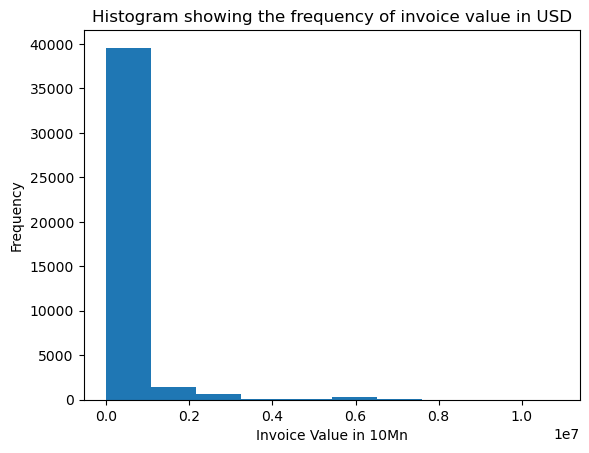

In [188]:
#Frequency of USD
rec_payment["USD Amount"].plot.hist()
plt.title("Histogram showing the frequency of invoice value in USD")
plt.xlabel("Invoice Value in 10Mn")
plt.show()

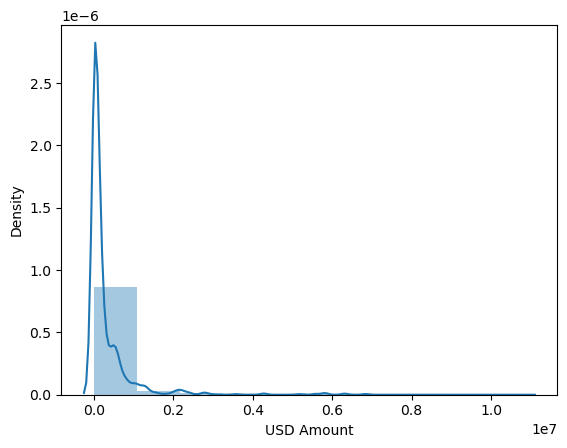

In [189]:
#Distribution of USD
sns.distplot(rec_payment["USD Amount"],bins=10)
plt.show()

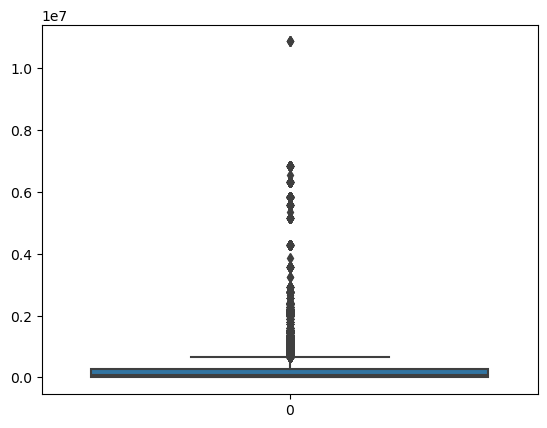

In [190]:
#Check for Outliers using Boxplot
sns.boxplot(rec_payment["USD Amount"])
plt.show()

Most Values outside teh whisker are continuous. Only one found above $10Mn

In [191]:
#check for Percentile values
rec_payment["USD Amount"].describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    4.205800e+04
mean     3.041674e+05
std      7.109582e+05
min      1.287743e+00
0%       1.287743e+00
25%      1.579608e+04
50%      6.861197e+04
75%      2.754132e+05
90%      7.251886e+05
95%      1.224990e+06
99%      4.273780e+06
100%     1.084983e+07
max      1.084983e+07
Name: USD Amount, dtype: float64

In [192]:
#Check records above 4.5Mn as values in 99% is around 4.27Mn 
rec_payment[rec_payment["USD Amount"]>4500000]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
24177,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,17-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24179,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,20-Jan-21,30-Mar-21,60 Days from EOM,INV,AED,Goods
24180,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,30-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24183,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,31-Mar-21,30-May-21,60 Days from EOM,INV,AED,Goods
24185,WIRE,SEPH Corp,2315,27-May-21,PMT,AED,5162944.89,1.4721E+11,10-Feb-21,30-Apr-21,60 Days from EOM,INV,AED,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,6-Apr-21,5-Jun-21,60 Days from Inv Date,INV,USD,Goods
63406,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,11-Apr-21,10-Apr-21,Immediate Payment,INV,USD,Goods
63407,WIRE,SEPH Corp,15768,29-Jun-21,PMT,USD,5814128.07,1.5621E+11,11-Apr-21,11-Apr-21,Immediate Payment,INV,USD,Goods
68669,WIRE,FUN Corp,1154,22-Mar-21,PMT,USD,6529190.85,1.6821E+11,28-Feb-21,30-Mar-21,30 Days from EOM,INV,USD,Non Goods


There are 4 Transactions by SEPH Corp

In [193]:
rec_payment[rec_payment["USD Amount"]>8000000]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
60057,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,3-Jan-21,3-Jan-21,Immediate Payment,INV,AED,Non Goods
60058,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,14-Feb-21,14-Feb-21,Immediate Payment,INV,AED,Non Goods
60059,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,26-Jan-21,26-Jan-21,Immediate Payment,INV,AED,Non Goods
60060,WIRE,SEPH Corp,2315,16-Feb-21,PMT,AED,10849828.8,1.5621E+11,12-Jan-21,12-Jan-21,Immediate Payment,INV,AED,Non Goods


SEPH Corp is the top Customer, also segmentation is done based on Average Payment Time

In [194]:
#Retain the Outliers
rec_payment.groupby("CUSTOMER_NAME")["USD Amount"].sum().sort_values(ascending=False)

CUSTOMER_NAME
SEPH Corp    6.153360e+09
ALLI Corp    1.652239e+09
FARO Corp    1.492450e+09
PARF Corp    6.955001e+08
CGR  Corp    2.508334e+08
                 ...     
HEAT Corp    1.633500e+02
PEAC Corp    1.225200e+02
DESI Corp    1.166971e+02
BEX  Corp    7.805310e+01
NOUS Corp    5.065655e+00
Name: USD Amount, Length: 689, dtype: float64

# Conversion of Data Formats

In [195]:
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [196]:
# Changing format of RECEIPT_DATE,DUE_DATE and INVOICE_CREATION_DATE
rec_payment["DUE_DATE"]=pd.to_datetime(rec_payment["DUE_DATE"],format="%d-%b-%y")
rec_payment["INVOICE_CREATION_DATE"]=pd.to_datetime(rec_payment["INVOICE_CREATION_DATE"],format="%d-%b-%y")
rec_payment["RECEIPT_DATE"]=pd.to_datetime(rec_payment["RECEIPT_DATE"],format="%d-%b-%y")
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


In [197]:
rec_payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42058 entries, 0 to 93931
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         42058 non-null  object        
 1   CUSTOMER_NAME          42058 non-null  object        
 2   CUSTOMER_NUMBER        42058 non-null  int64         
 3   RECEIPT_DATE           42058 non-null  datetime64[ns]
 4   CLASS                  42058 non-null  object        
 5   CURRENCY_CODE          42058 non-null  object        
 6   USD Amount             42058 non-null  float64       
 7   INVOICE_ALLOCATED      42058 non-null  object        
 8   INVOICE_CREATION_DATE  42058 non-null  datetime64[ns]
 9   DUE_DATE               42058 non-null  datetime64[ns]
 10  PAYMENT_TERM           42058 non-null  object        
 11  INVOICE_CLASS          42058 non-null  object        
 12  INVOICE_CURRENCY_CODE  42058 non-null  object        
 13  INVOIC

<Axes: ylabel='RECEIPT_METHOD'>

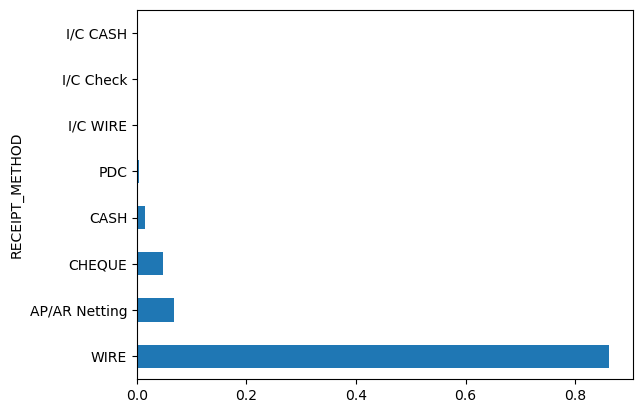

In [198]:
#Checking the Variables - Receipt_Method
rec_payment.RECEIPT_METHOD.value_counts(normalize=True).plot.barh()

Major payments are received via WIRE method

In [199]:
print("No of customer names are :",rec_payment.CUSTOMER_NAME.nunique())
print("No of customer number are :",rec_payment.CUSTOMER_NUMBER.nunique())

No of customer names are : 689
No of customer number are : 1048


In [200]:
#Drop Customer Number
rec_payment.drop("CUSTOMER_NUMBER",axis=1,inplace=True)
rec_payment.shape

(42058, 13)

In [201]:
rec_payment.groupby("CUSTOMER_NAME")["USD Amount"].sum().sort_values(ascending=False).head(10)

CUSTOMER_NAME
SEPH Corp    6.153360e+09
ALLI Corp    1.652239e+09
FARO Corp    1.492450e+09
PARF Corp    6.955001e+08
CGR  Corp    2.508334e+08
RADW Corp    2.430579e+08
HABC Corp    2.323890e+08
AREE Corp    2.012016e+08
PCD  Corp    1.426100e+08
DUBA Corp    1.003589e+08
Name: USD Amount, dtype: float64

In [202]:
#Top 10 Customer based on Volume of Transaction
rec_payment.CUSTOMER_NAME.value_counts().head(10)

CUSTOMER_NAME
SEPH Corp    4945
FARO Corp    4177
ALLI Corp    3580
PARF Corp    2409
YOUG Corp    1480
RADW Corp    1318
DEBE Corp     922
HABC Corp     764
CGR  Corp     730
REAL Corp     697
Name: count, dtype: int64

In [203]:
#Check the payment terms of the top customers by value of transactions
rec_payment.groupby(["CUSTOMER_NAME","PAYMENT_TERM"])["USD Amount"].sum().sort_values(ascending=False).head(10)

CUSTOMER_NAME  PAYMENT_TERM         
SEPH Corp      Immediate Payment        1.946815e+09
               60 Days from Inv Date    1.657258e+09
ALLI Corp      30 Days from EOM         1.091027e+09
SEPH Corp      Immediate                7.930745e+08
               30 Days from Inv Date    7.740826e+08
               60 Days from EOM         7.044823e+08
FARO Corp      30 Days from EOM         4.389920e+08
PARF Corp      30 Days from Inv Date    3.427936e+08
FARO Corp      15 Days from EOM         3.376944e+08
ALLI Corp      Immediate                2.060997e+08
Name: USD Amount, dtype: float64

30 & 60 days from EOM or Invoice date and Immediate payment are some of the popular payment terms

In [204]:
rec_payment.groupby(["CUSTOMER_NAME","PAYMENT_TERM"])["USD Amount"].count().sort_values(ascending=False).head(10)

CUSTOMER_NAME  PAYMENT_TERM         
ALLI Corp      30 Days from EOM         2077
SEPH Corp      60 Days from Inv Date    1774
PARF Corp      30 Days from Inv Date    1684
YOUG Corp      Immediate Payment        1480
FARO Corp      15 Days from EOM         1119
               30 Days from EOM          979
RADW Corp      30 Days from EOM          765
SEPH Corp      30 Days from Inv Date     749
               Immediate Payment         670
               60 Days from EOM          558
Name: USD Amount, dtype: int64

In [205]:
rec_payment.CLASS.value_counts()

CLASS
PMT    42058
Name: count, dtype: int64

In [206]:
# Dropping the column CLASS
rec_payment.drop("CLASS",axis=1,inplace=True)
rec_payment.shape

(42058, 12)

In [207]:
#Check for Redundancy
rec_payment.groupby(["INVOICE_CURRENCY_CODE","CURRENCY_CODE"])["USD Amount"].count()

INVOICE_CURRENCY_CODE  CURRENCY_CODE
AED                    AED              16212
                       EUR                  2
                       SAR                  8
                       USD                548
BHD                    AED                 43
                       BHD                 56
                       SAR                  1
                       USD                121
EUR                    AED                 35
                       EUR                439
                       SAR                  2
                       USD                 29
GBP                    GBP                 50
                       USD                  3
JOD                    AED                 15
                       USD                  3
KWD                    AED                 52
                       KWD                 10
                       SAR                  1
                       USD                386
QAR                    AED                 

Invoice currency and receipt currency can be different.No redundancy

In [208]:
rec_payment.INVOICE_ALLOCATED.value_counts()

INVOICE_ALLOCATED
1.0721E+11          2066
1.4821E+11          1309
1.512E+11           1207
2.3021E+11          1195
1.072E+11           1177
                    ... 
PAY1521002100385       1
PAY1521002100386       1
IC15210021051762       1
IC15210021052094       1
IC15314821054110       1
Name: count, Length: 12317, dtype: int64

In [209]:
#Drop the Irrelevant column
rec_payment.drop("INVOICE_ALLOCATED",axis=1,inplace=True)
rec_payment.shape

(42058, 11)

In [210]:
rec_payment.PAYMENT_TERM.value_counts(normalize=True)

PAYMENT_TERM
30 Days from EOM                                           0.206001
30 Days from Inv Date                                      0.180132
60 Days from Inv Date                                      0.127134
Immediate Payment                                          0.087237
60 Days from EOM                                           0.070165
15 Days from EOM                                           0.065005
Immediate                                                  0.064649
45 Days from Inv Date                                      0.053117
90 Days from EOM                                           0.037543
90 Days from Inv Date                                      0.025037
45 Days from EOM                                           0.022207
100% Adv Payment                                           0.017737
25 DAYS FROM EOM                                           0.007680
45 DAYS + EOM                                              0.006348
15 Days from Inv Date              

In [211]:
#club the terms to reduce unique records
rec_payment["PAYMENT_TERM"]=rec_payment.PAYMENT_TERM.replace(["Immediate Payment"],"Immediate")
rec_payment["PAYMENT_TERM"]=rec_payment.PAYMENT_TERM.replace(["45 DAYS + EOM",],"45 Days from EOM")

In [212]:
rec_payment.PAYMENT_TERM.value_counts(normalize=True).cumsum()

PAYMENT_TERM
30 Days from EOM                                           0.206001
30 Days from Inv Date                                      0.386133
Immediate                                                  0.538019
60 Days from Inv Date                                      0.665153
60 Days from EOM                                           0.735318
15 Days from EOM                                           0.800323
45 Days from Inv Date                                      0.853440
90 Days from EOM                                           0.890984
45 Days from EOM                                           0.919540
90 Days from Inv Date                                      0.944577
100% Adv Payment                                           0.962314
25 DAYS FROM EOM                                           0.969994
15 Days from Inv Date                                      0.976271
Cash on Delivery                                           0.982453
EOM                                

In [213]:
value_to_keep=rec_payment.PAYMENT_TERM.value_counts(normalize=True).index[:11]
rec_payment["PAYMENT_TERM"]= rec_payment["PAYMENT_TERM"].apply(lambda x: x if x in value_to_keep else "Others")

In [214]:
rec_payment.PAYMENT_TERM.value_counts(normalize=True)*100

PAYMENT_TERM
30 Days from EOM         20.600124
30 Days from Inv Date    18.013220
Immediate                15.188549
60 Days from Inv Date    12.713396
60 Days from EOM          7.016501
15 Days from EOM          6.500547
45 Days from Inv Date     5.311712
Others                    3.768605
90 Days from EOM          3.754339
45 Days from EOM          2.855580
90 Days from Inv Date     2.503685
100% Adv Payment          1.773741
Name: proportion, dtype: float64

In [215]:
rec_payment.INVOICE_CLASS.value_counts(normalize=True)*100

INVOICE_CLASS
INV    93.328261
CM      6.464882
DM      0.206857
Name: proportion, dtype: float64

In [216]:
rec_payment.INVOICE_CURRENCY_CODE.value_counts(normalize=True)*100

INVOICE_CURRENCY_CODE
AED    39.873508
SAR    39.091255
USD    17.604261
EUR     1.200723
KWD     1.067573
BHD     0.525465
QAR     0.418470
GBP     0.126016
ZAR     0.049931
JOD     0.042798
Name: proportion, dtype: float64

In [217]:
rec_payment.INVOICE_TYPE.value_counts(normalize=True)

INVOICE_TYPE
Goods        0.527533
Non Goods    0.472467
Name: proportion, dtype: float64

# Target Variable

In [218]:
rec_payment["TARGET"]=(rec_payment["RECEIPT_DATE"]>rec_payment["DUE_DATE"]).astype(int)

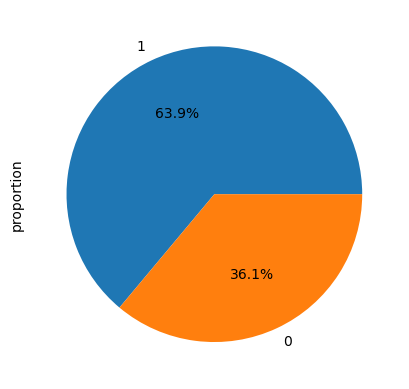

In [219]:
np.round(rec_payment.TARGET.value_counts(normalize=True)*100,2).plot.pie(autopct="%.1f%%")
plt.show()

In [220]:
# creating the variable to use in Customer Segmentation
# Payment time created considering the receipt date and due date.
# This helps identify early, timely payments and delayed payments.
rec_payment["PAYMENT_TIME_DAYS"]=(rec_payment["RECEIPT_DATE"]-rec_payment["DUE_DATE"]).dt.days

In [221]:
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17


In [222]:
rec_payment.PAYMENT_TIME_DAYS.describe()

count    42058.000000
mean        78.830591
std        220.199745
min       -340.000000
25%         -6.000000
50%         15.000000
75%         54.000000
max       3873.000000
Name: PAYMENT_TIME_DAYS, dtype: float64

Advance Payment, a year ahed is observed - Minimum value is -340

In [223]:
rec_payment[rec_payment["PAYMENT_TIME_DAYS"]<0]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
2,WIRE,RADW Corp,2021-01-31,SAR,41991.609710,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29
16,WIRE,RADW Corp,2021-03-15,SAR,4665.734413,2021-02-25,2021-03-27,30 Days from Inv Date,INV,SAR,Non Goods,0,-12
47,WIRE,RADW Corp,2021-06-30,SAR,53655.945740,2021-06-24,2021-07-24,30 Days from Inv Date,INV,SAR,Non Goods,0,-24
48,WIRE,ALLI Corp,2021-01-13,AED,6448.740000,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0,-17
56,WIRE,QATA Corp,2021-01-19,AED,38302.390000,2021-01-28,2021-01-28,Immediate,CM,USD,Non Goods,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93907,WIRE,TRAF Corp,2021-06-07,AED,17656.441120,2021-05-27,2021-06-26,30 Days from Inv Date,INV,USD,Non Goods,0,-19
93912,WIRE,ANAN Corp,2021-04-08,USD,6398.740000,2021-03-11,2021-04-10,30 Days from Inv Date,INV,AED,Goods,0,-2
93923,WIRE,PEAR Corp,2021-04-01,USD,59914.500000,2021-02-02,2021-04-03,60 Days from Inv Date,INV,USD,Goods,0,-2
93925,WIRE,PEAR Corp,2021-04-01,USD,59914.500000,2021-02-14,2021-04-13,60 Days from Inv Date,INV,USD,Goods,0,-12


In [224]:
#finding lower treshold
IQR=54-(-6)
IQR
Q1=(-6)-(1.5*(IQR))
Q1

-96.0

In [225]:
#check for payment made >100 days before due date
rec_payment[rec_payment["PAYMENT_TIME_DAYS"]<-100]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS
4604,WIRE,AL M Corp,2021-02-03,SAR,833.372152,2021-03-24,2021-06-22,90 Days from Inv Date,INV,SAR,Non Goods,0,-139
12196,WIRE,BACC Corp,2021-01-07,EUR,13357.930000,2021-01-04,2021-04-30,90 Days from EOM,INV,EUR,Non Goods,0,-113
12241,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-06-30,60 Days from EOM,INV,EUR,Non Goods,0,-161
12242,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-30,2021-05-30,60 Days from EOM,INV,EUR,Non Goods,0,-130
12244,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-31,2021-05-30,60 Days from Inv Date,INV,EUR,Non Goods,0,-130
12248,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-31,2021-06-30,90 Days from EOM,INV,EUR,Non Goods,0,-161
12252,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-03-30,2021-06-30,90 Days from EOM,INV,EUR,Non Goods,0,-161
12288,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-07-30,90 Days from EOM,INV,EUR,Non Goods,0,-191
12295,WIRE,BERN Corp,2021-01-20,EUR,16881.980000,2021-04-30,2021-06-29,60 Days from Inv Date,INV,EUR,Non Goods,0,-160
12402,WIRE,CAMI Corp,2021-01-26,USD,35.280000,2021-05-19,2021-05-19,100% Adv Payment,INV,USD,Non Goods,0,-113


In [226]:
rec_payment["INVOICE_YEAR"]=rec_payment["INVOICE_CREATION_DATE"].dt.year
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_YEAR
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,2020
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,2020
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,2021
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020


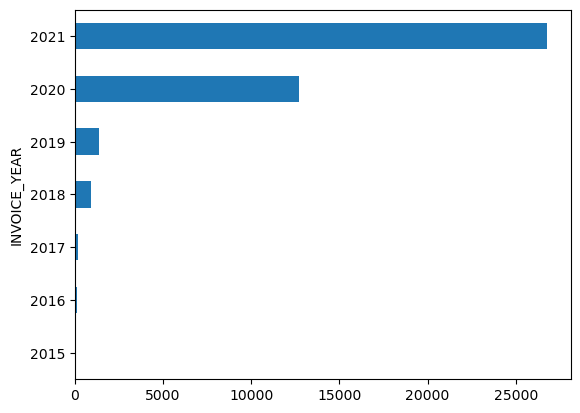

In [227]:
#Plotting the Invoice year to check for Volume
rec_payment.groupby("INVOICE_YEAR")["TARGET"].count().plot.barh()
plt.show()

In [228]:
print(rec_payment.columns)

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'TARGET',
       'PAYMENT_TIME_DAYS', 'INVOICE_YEAR'],
      dtype='object')


In [229]:
rec_payment["INVOICE_MONTH"]=rec_payment["INVOICE_CREATION_DATE"].dt.month
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_YEAR,INVOICE_MONTH
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,2020,11
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,2020,12
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,2021,1
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020,12
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020,12


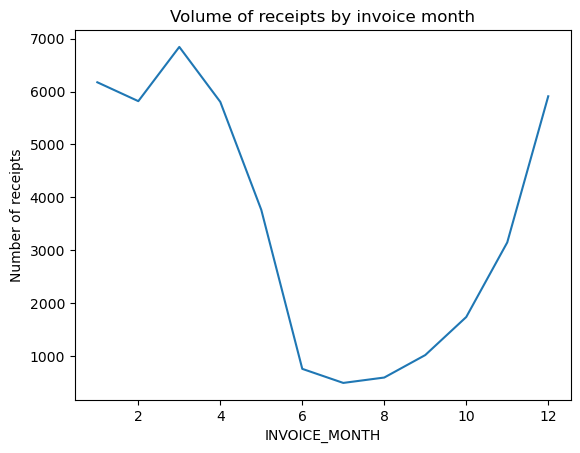

In [230]:
import matplotlib.pyplot as plt

rec_payment.groupby("INVOICE_MONTH")["TARGET"].count().plot() # Replace "INVOICE_MONTH" with the correct column name
plt.title("Volume of receipts by invoice month")
plt.ylabel("Number of receipts")
plt.show()

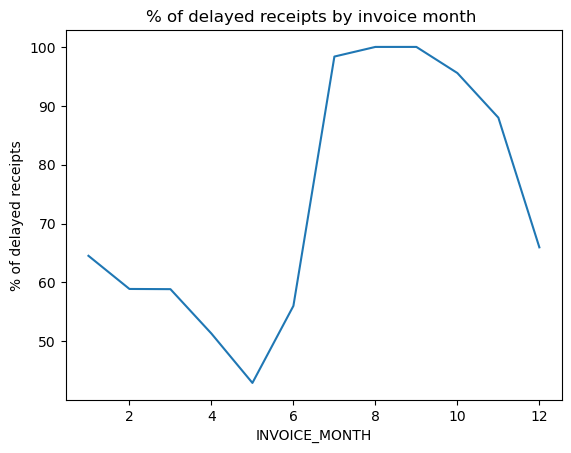

In [231]:
(rec_payment.groupby("INVOICE_MONTH")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by invoice month ")
plt.ylabel("% of delayed receipts")
plt.show()

The receipts show that March had the highest number of invoices, followed by January and Customers tend to delay payments for invoices issued between July and September.

In [232]:
rec_payment["DUE_MONTH"]=rec_payment["DUE_DATE"].dt.month
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_YEAR,INVOICE_MONTH,DUE_MONTH
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,2020,11,12
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,2020,12,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,2021,1,3
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020,12,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020,12,1


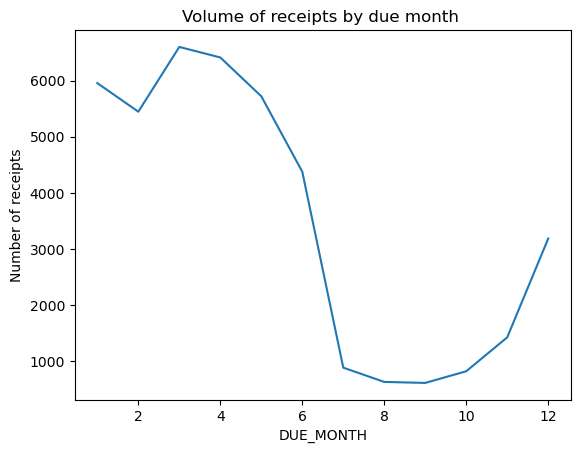

In [233]:
rec_payment.groupby("DUE_MONTH")["TARGET"].count().plot()
plt.title("Volume of receipts by due month ")
plt.ylabel("Number of receipts")
plt.show()

Most payments received corresponded to invoices that were due in March, indicating that both invoice generation and due amounts peaked in March.

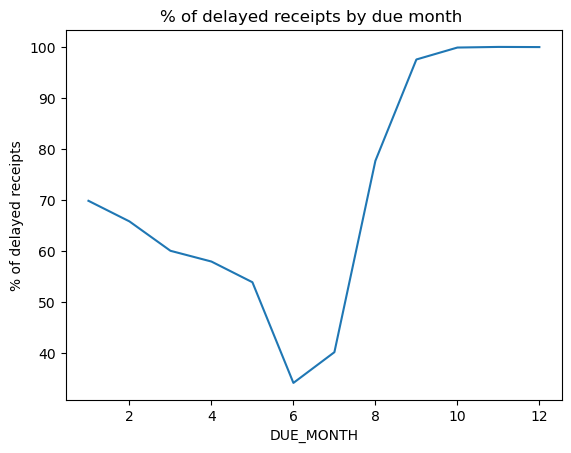

In [234]:
(rec_payment.groupby("DUE_MONTH")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by due month ")
plt.ylabel("% of delayed receipts")
plt.show()

Payments for invoices scheduled to be received between October and December have experienced delays.

In [235]:
rec_payment["DUE_DAY"]=rec_payment["DUE_DATE"].dt.weekday
rec_payment["INVOICE_DAY"]=rec_payment["INVOICE_CREATION_DATE"].dt.weekday
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_YEAR,INVOICE_MONTH,DUE_MONTH,DUE_DAY,INVOICE_DAY
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,2020,11,12,2,0
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,2020,12,1,3,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,2021,1,3,0,5
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020,12,1,3,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020,12,1,3,1


We will examine if the day of the week affects payment delays by creating the columns DUE_DAY and INVOICE_DAY, where 0 represents Monday and 6 represents Sunday.

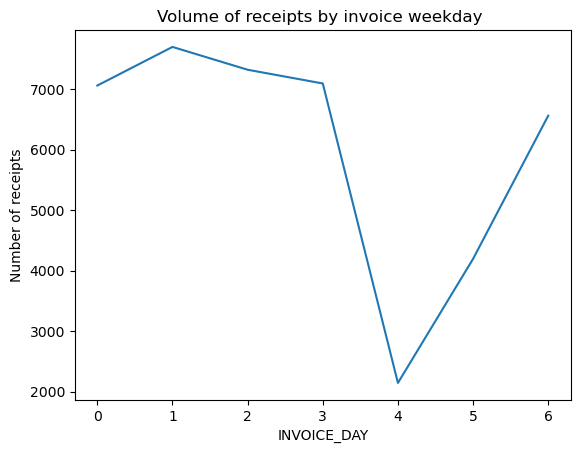

In [236]:
rec_payment.groupby("INVOICE_DAY")["TARGET"].count().plot()
plt.title("Volume of receipts by invoice weekday ")
plt.ylabel("Number of receipts")
plt.show()

Fridyas very less Invoices are raised

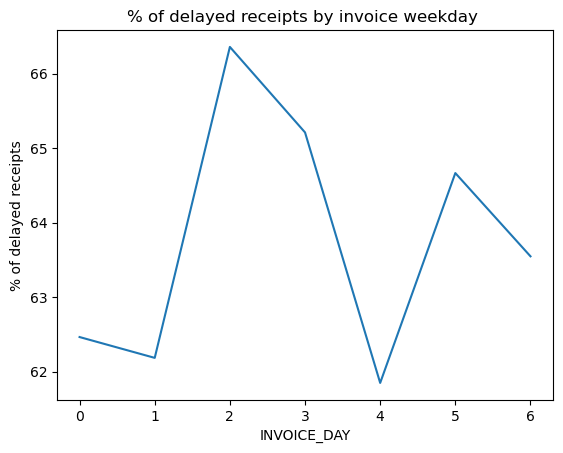

In [237]:
(rec_payment.groupby("INVOICE_DAY")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by invoice weekday ")
plt.ylabel("% of delayed receipts")
plt.show()

Invoices raised on Wednesdays have highest delay rate

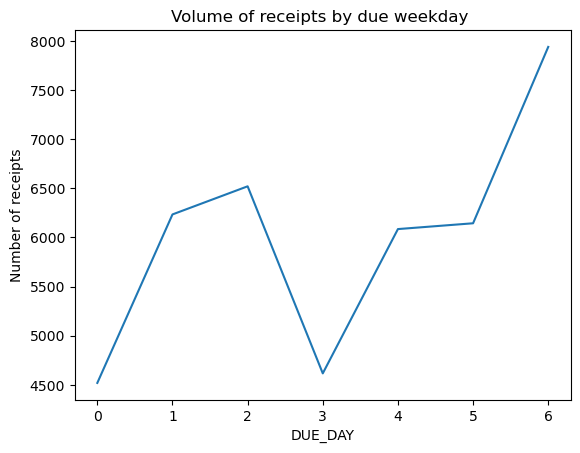

In [238]:
rec_payment.groupby("DUE_DAY")["TARGET"].count().plot()
plt.title("Volume of receipts by due weekday ")
plt.ylabel("Number of receipts")
plt.show()

Highest number of Invoices are due on Sunday

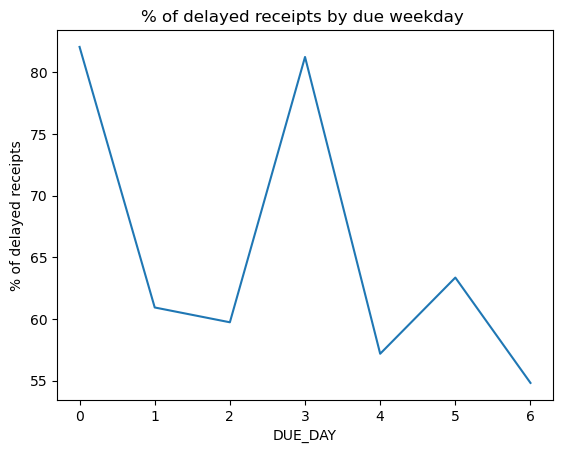

In [239]:
(rec_payment.groupby("DUE_DAY")["TARGET"].mean()*100).plot()
plt.title("% of delayed receipts by due weekday ")
plt.ylabel("% of delayed receipts")
plt.show()

Invoices due on Monday and Thursday have highest delay rates

In [240]:
rec_payment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42058 entries, 0 to 93931
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         42058 non-null  object        
 1   CUSTOMER_NAME          42058 non-null  object        
 2   RECEIPT_DATE           42058 non-null  datetime64[ns]
 3   CURRENCY_CODE          42058 non-null  object        
 4   USD Amount             42058 non-null  float64       
 5   INVOICE_CREATION_DATE  42058 non-null  datetime64[ns]
 6   DUE_DATE               42058 non-null  datetime64[ns]
 7   PAYMENT_TERM           42058 non-null  object        
 8   INVOICE_CLASS          42058 non-null  object        
 9   INVOICE_CURRENCY_CODE  42058 non-null  object        
 10  INVOICE_TYPE           42058 non-null  object        
 11  TARGET                 42058 non-null  int32         
 12  PAYMENT_TIME_DAYS      42058 non-null  int64         
 13  INVOIC

In [241]:
rec_payment.describe()

,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,TARGET,PAYMENT_TIME_DAYS,INVOICE_YEAR,INVOICE_MONTH,DUE_MONTH,DUE_DAY,INVOICE_DAY
count,42058,4.205800e+04,42058,42058,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000,42058.000000
mean,2021-04-07 12:23:12.819439872,3.041674e+05,2020-12-11 15:53:22.149412608,2021-01-18 16:27:09.749393920,0.639094,78.830591,2020.537948,5.353084,4.657687,3.229184,2.674973
min,2021-01-01 00:00:00,1.287743e+00,2015-01-29 00:00:00,2010-10-30 00:00:00,0.000000,-340.000000,2015.000000,1.000000,1.000000,0.000000,0.000000
25%,2021-02-21 00:00:00,1.579608e+04,2020-12-09 00:00:00,2021-01-15 00:00:00,0.000000,-6.000000,2020.000000,2.000000,2.000000,1.000000,1.000000
50%,2021-04-08 00:00:00,6.861197e+04,2021-01-31 00:00:00,2021-03-12 00:00:00,1.000000,15.000000,2021.000000,4.000000,4.000000,3.000000,2.000000
75%,2021-05-26 00:00:00,2.754132e+05,2021-03-27 00:00:00,2021-04-30 00:00:00,1.000000,54.000000,2021.000000,10.000000,6.000000,5.000000,5.000000
max,2021-06-30 00:00:00,1.084983e+07,2021-07-05 00:00:00,2022-05-09 00:00:00,1.000000,3873.000000,2021.000000,12.000000,12.000000,6.000000,6.000000
std,NaN,7.109582e+05,NaN,NaN,0.480269,220.199745,0.739735,3.930782,3.172182,2.022473,2.040550


<Axes: ylabel='proportion'>

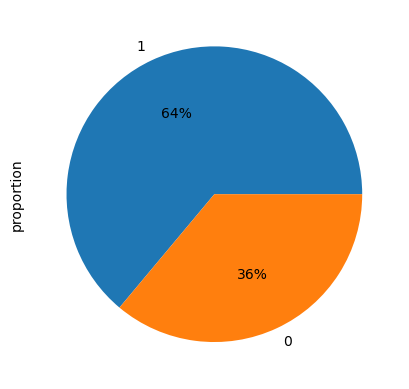

In [242]:
#Split of target variable
np.round(rec_payment.TARGET.value_counts(normalize=True)*100,2).plot.pie(autopct="%.f%%")

# Variable Categorization

In [243]:
rec_payment.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'TARGET',
       'PAYMENT_TIME_DAYS', 'INVOICE_YEAR', 'INVOICE_MONTH', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY'],
      dtype='object')

In [244]:
#Categorize Variables
cat_var=["RECEIPT_METHOD",'CURRENCY_CODE','PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE']
num_var=["USD Amount","PAYMENT_TIME_DAYS","TARGET",'INVOICE_MONTH', 'INVOICE_YEAR', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY']
other_var=['CUSTOMER_NAME', 'RECEIPT_DATE','INVOICE_CREATION_DATE', 'DUE_DATE']

# Data Visualization

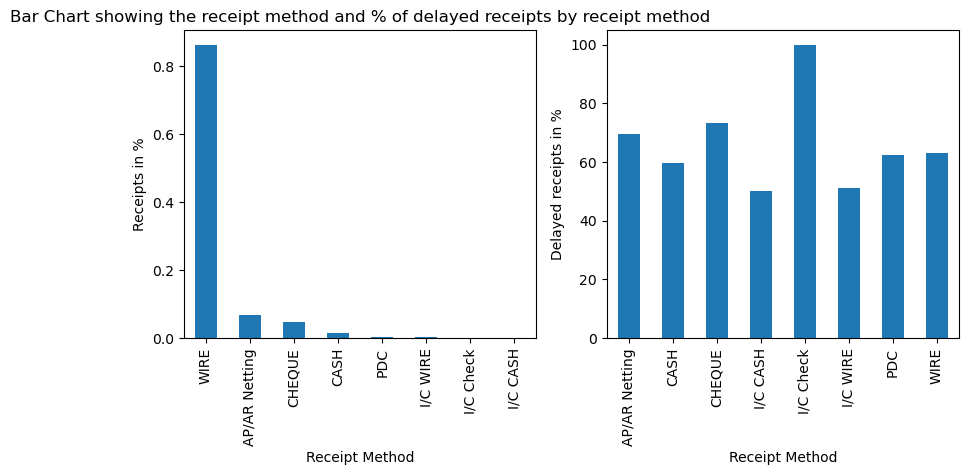

In [245]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment["RECEIPT_METHOD"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the receipt method and % of delayed receipts by receipt method",loc="center")
plt.xlabel("Receipt Method")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment.groupby("RECEIPT_METHOD")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Receipt Method")
plt.ylabel("Delayed receipts in %")
plt.show()

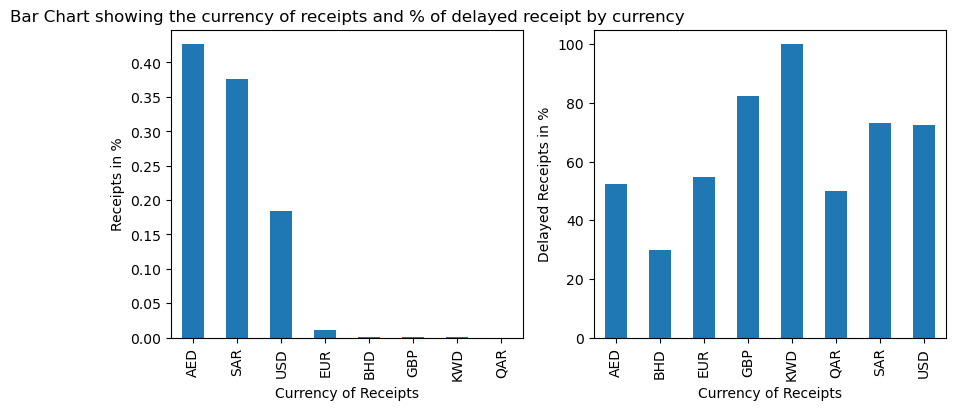

In [246]:
# Receipts are more in AED followed by SAR and USD. Delay in receipts highest where receipts are in KWD followed by GBP.
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment["CURRENCY_CODE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the currency of receipts and % of delayed receipt by currency",loc="center")
plt.xlabel("Currency of Receipts")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment.groupby("CURRENCY_CODE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Currency of Receipts")
plt.ylabel("Delayed Receipts in %")
plt.show()

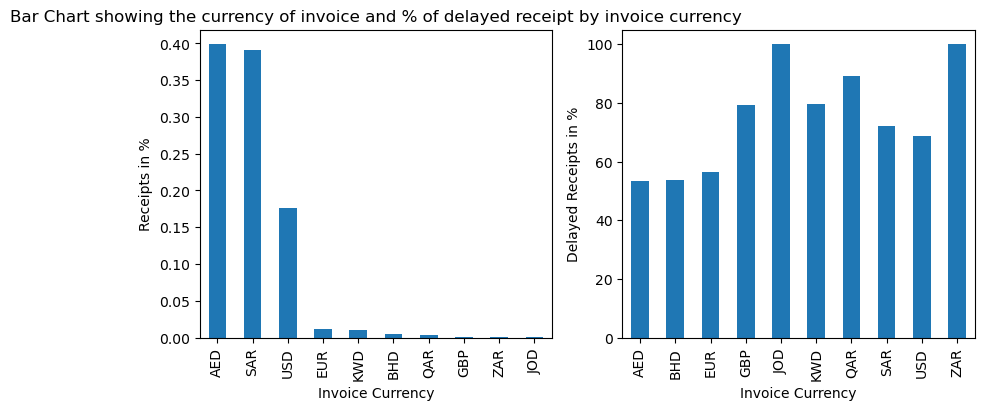

In [247]:
# Delay in receipts where invoicing currency in JOD and ZAR- 100% of the cases
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment["INVOICE_CURRENCY_CODE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the currency of invoice and % of delayed receipt by invoice currency",loc="center")
plt.xlabel("Invoice Currency")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment.groupby("INVOICE_CURRENCY_CODE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Currency")
plt.ylabel("Delayed Receipts in %")
plt.show()


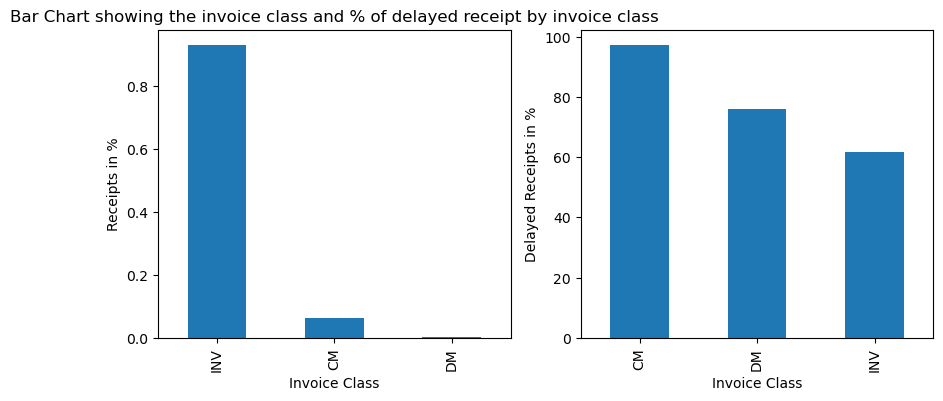

In [248]:
# Though few in number, very significant receipts delays in CM
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment["INVOICE_CLASS"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the invoice class and % of delayed receipt by invoice class",loc="center")
plt.xlabel("Invoice Class")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment.groupby("INVOICE_CLASS")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Class")
plt.ylabel("Delayed Receipts in %")
plt.show()

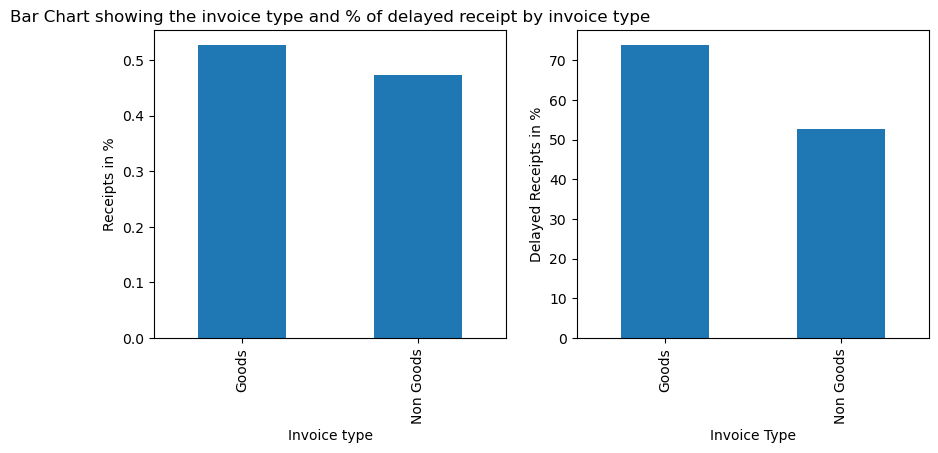

In [249]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment["INVOICE_TYPE"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the invoice type and % of delayed receipt by invoice type",loc="center")
plt.xlabel("Invoice type")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment.groupby("INVOICE_TYPE")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Invoice Type")
plt.ylabel("Delayed Receipts in %")
plt.show()

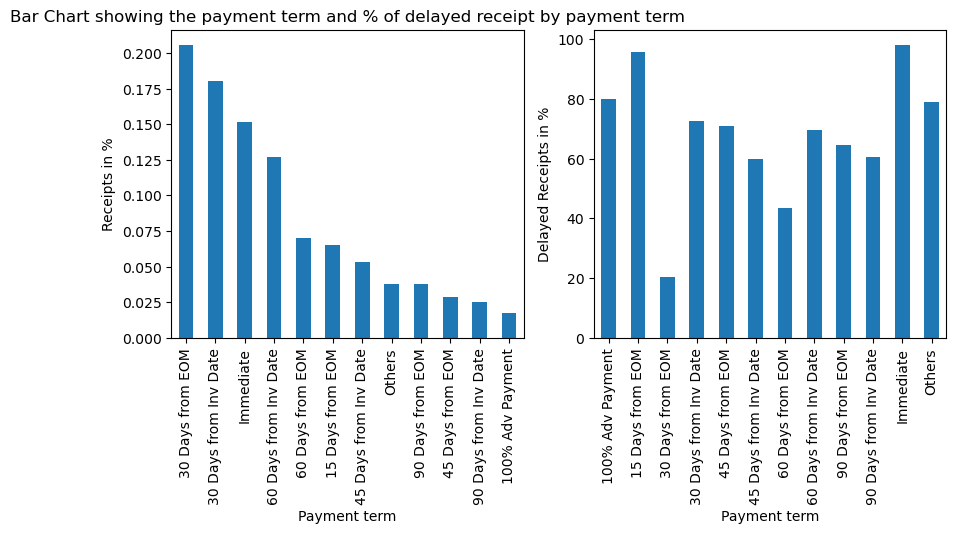

In [250]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
rec_payment["PAYMENT_TERM"].value_counts(normalize=True).plot.bar()
plt.title("Bar Chart showing the payment term and % of delayed receipt by payment term",loc="center")
plt.xlabel("Payment term")
plt.ylabel("Receipts in %")

plt.subplot(1,2,2)
(rec_payment.groupby("PAYMENT_TERM")["TARGET"].mean()*100).plot.bar()
plt.xlabel("Payment term")
plt.ylabel("Delayed Receipts in %")
plt.show()

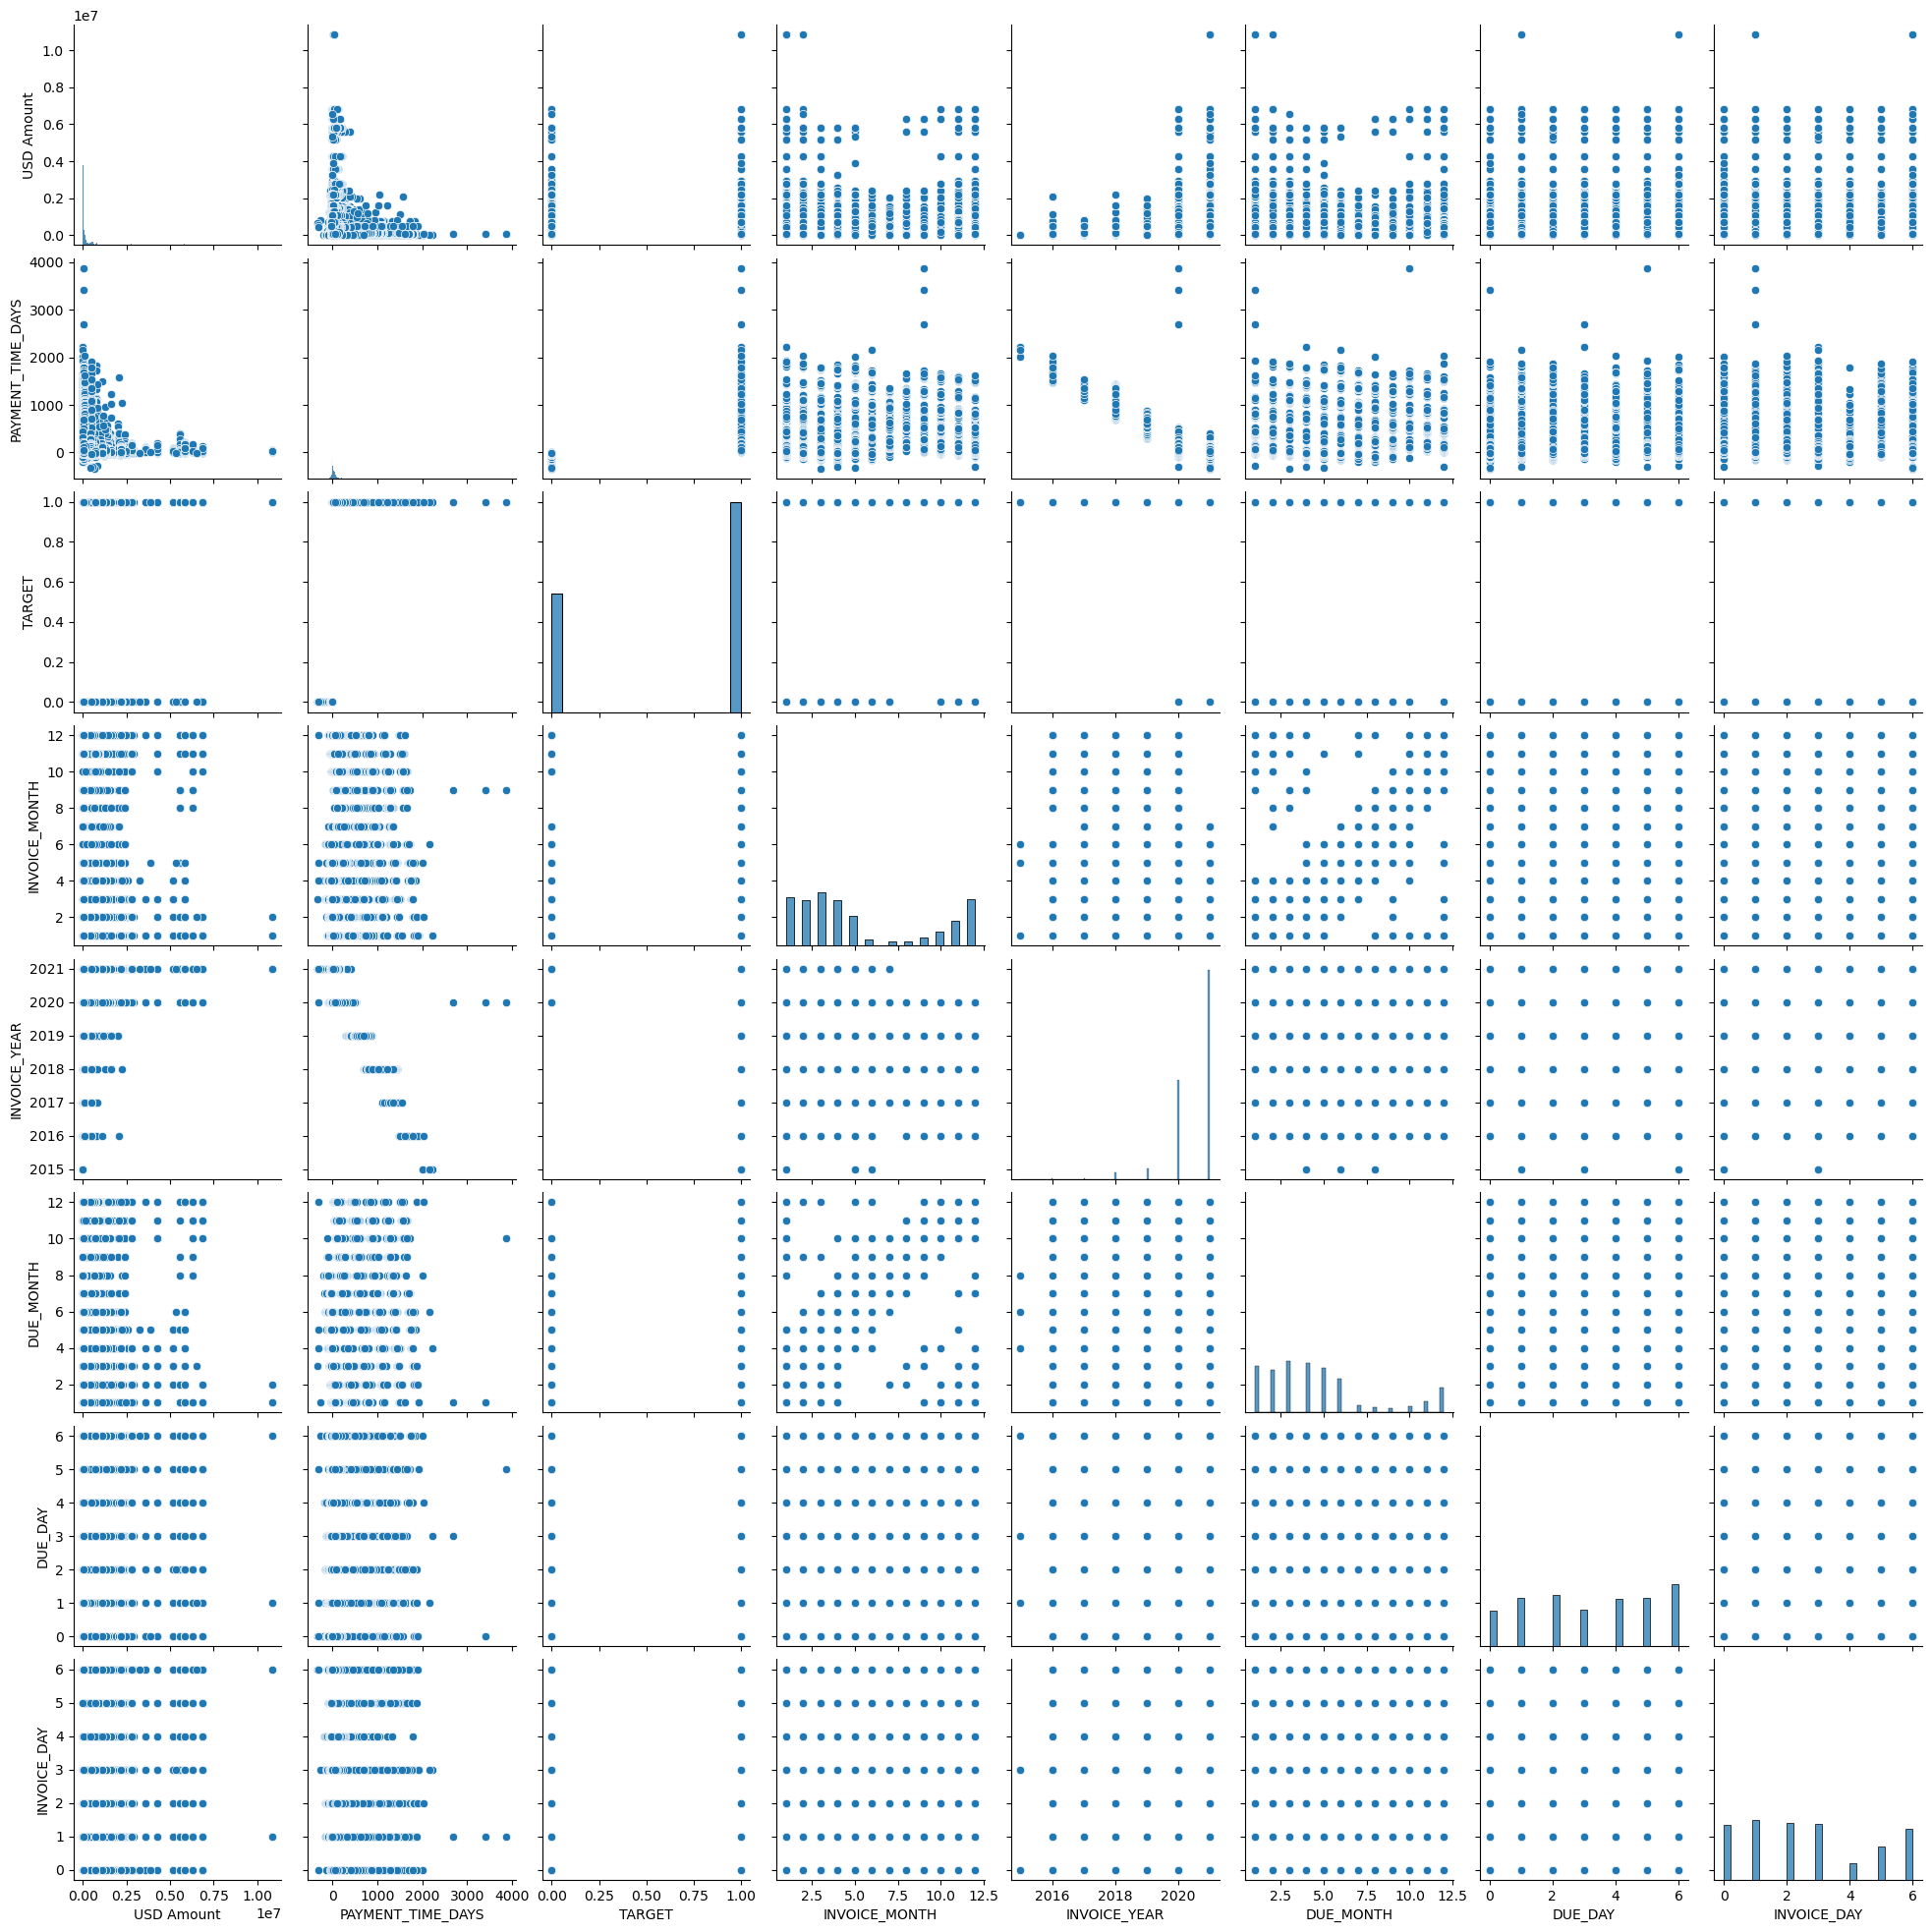

In [251]:
# Univariate Analysis of numeric variables has been done in the checking for outliers step.Hence only bivariate analysis done here.
sns.pairplot(data= rec_payment,vars=num_var)
plt.show()

Boxplot RECEIPT_METHOD Vs USD Amount


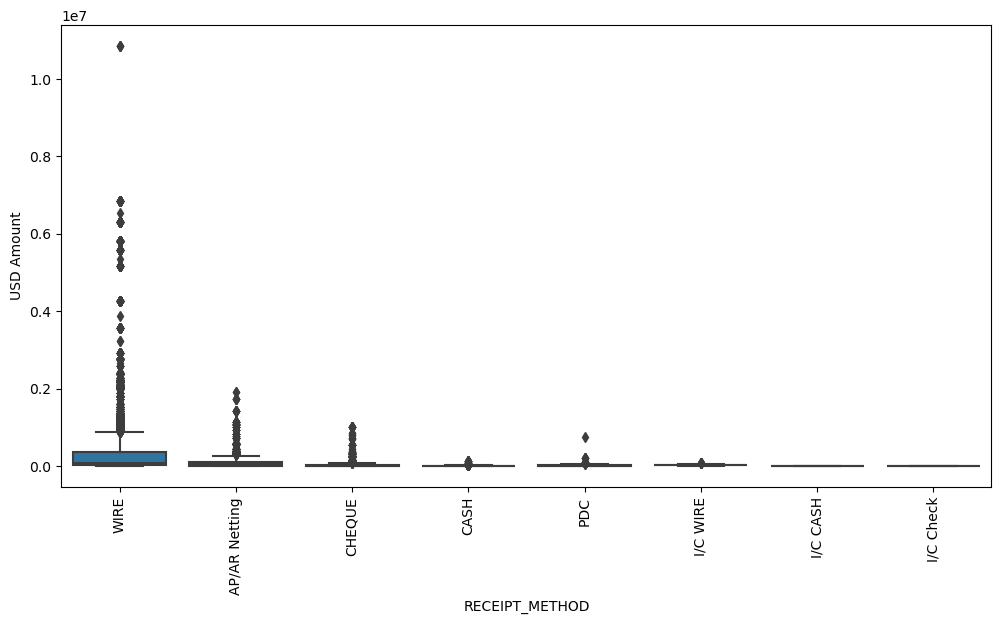

Boxplot CURRENCY_CODE Vs USD Amount


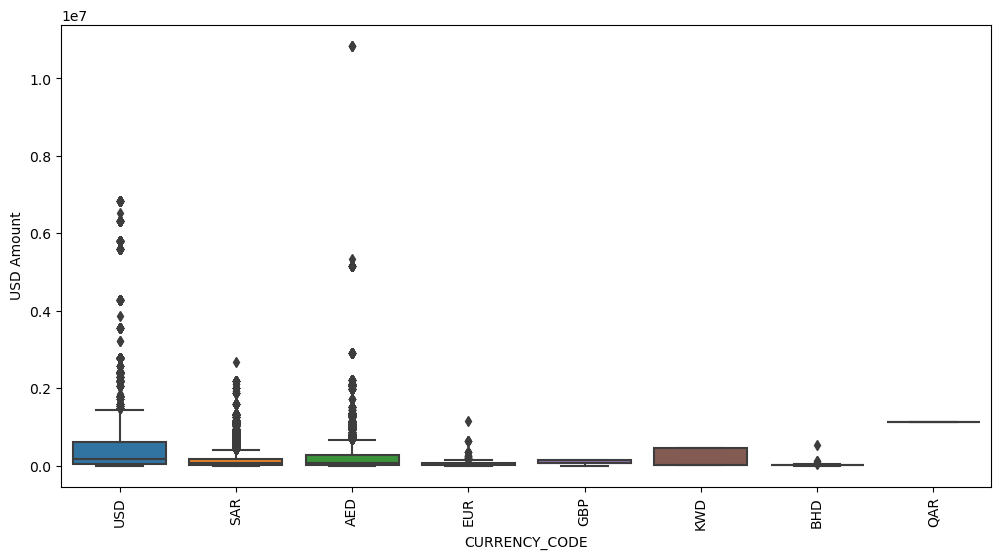

Boxplot PAYMENT_TERM Vs USD Amount


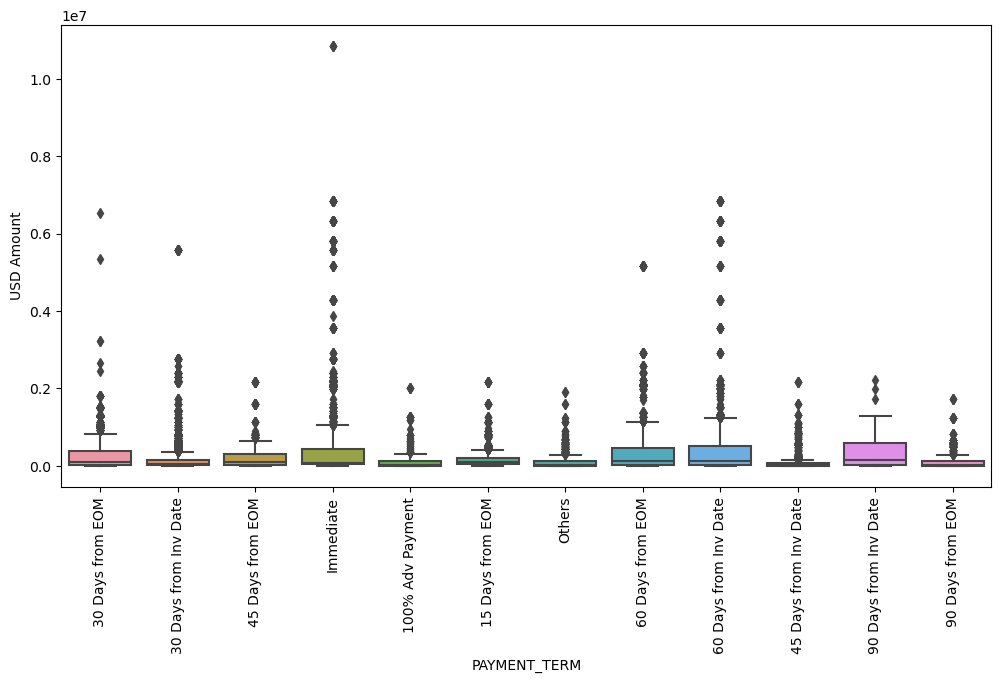

Boxplot INVOICE_CLASS Vs USD Amount


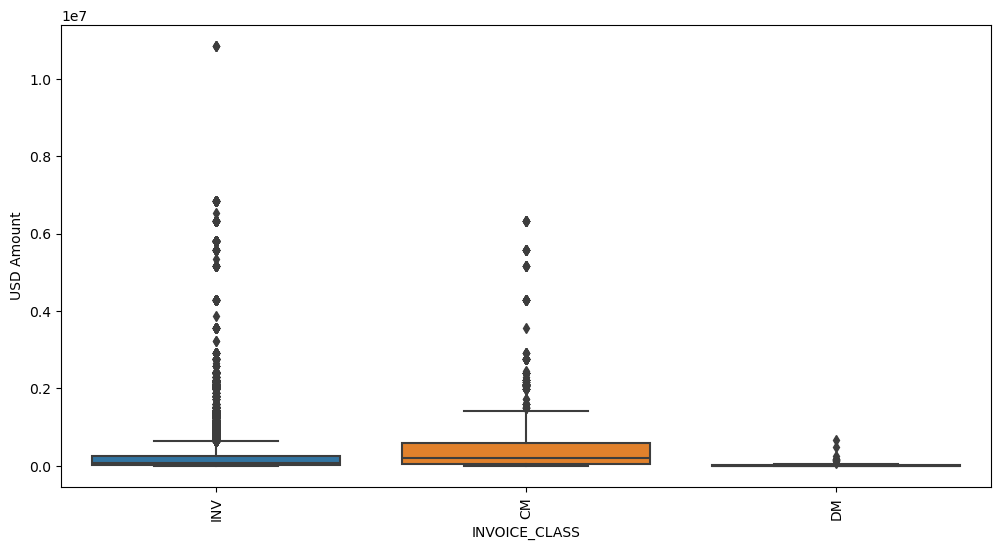

Boxplot INVOICE_CURRENCY_CODE Vs USD Amount


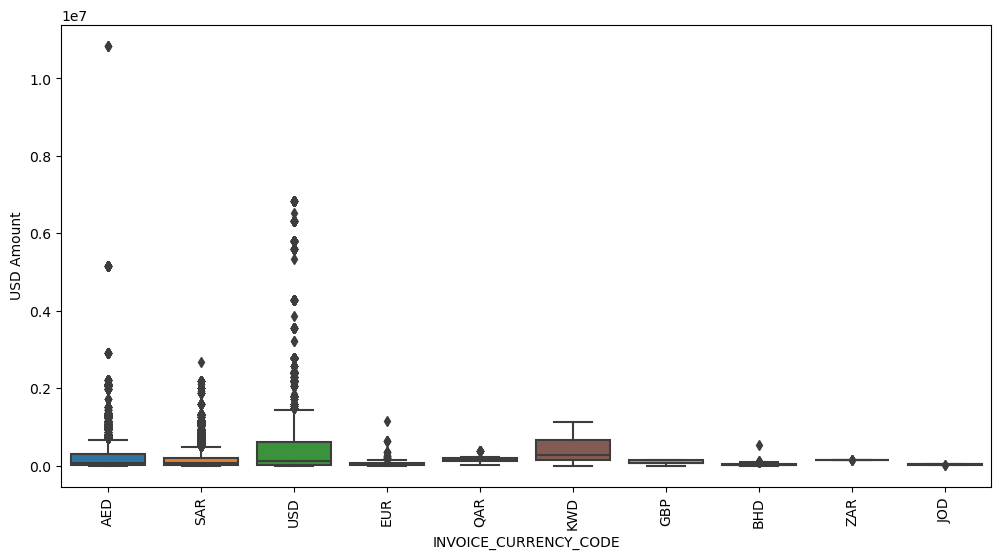

Boxplot INVOICE_TYPE Vs USD Amount


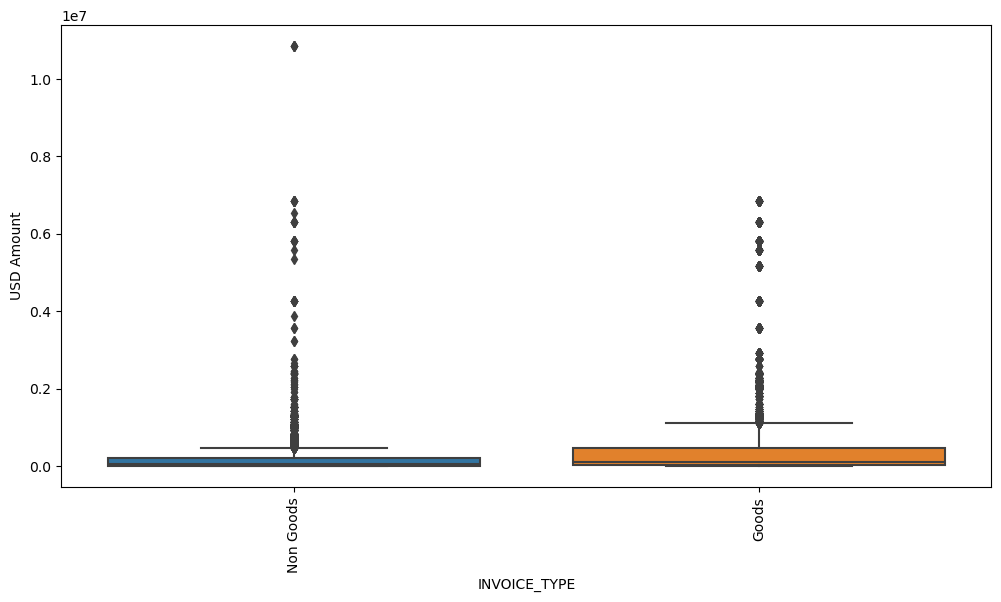

In [252]:
# Bivariate Analysis between numeric and categorical variables
for i in cat_var:        
    plt.figure(figsize=(12,6))
    print("Boxplot", i, "Vs USD Amount")
    sns.boxplot(data=rec_payment, x= i, y="USD Amount")
    plt.xticks(rotation=90)
    plt.show()

Boxplot RECEIPT_METHOD Vs PAYMENT_TIME_DAYS


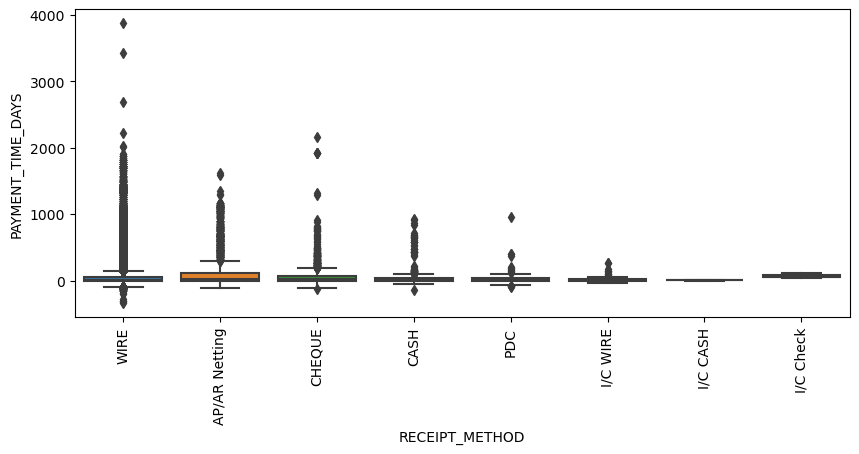

Boxplot CURRENCY_CODE Vs PAYMENT_TIME_DAYS


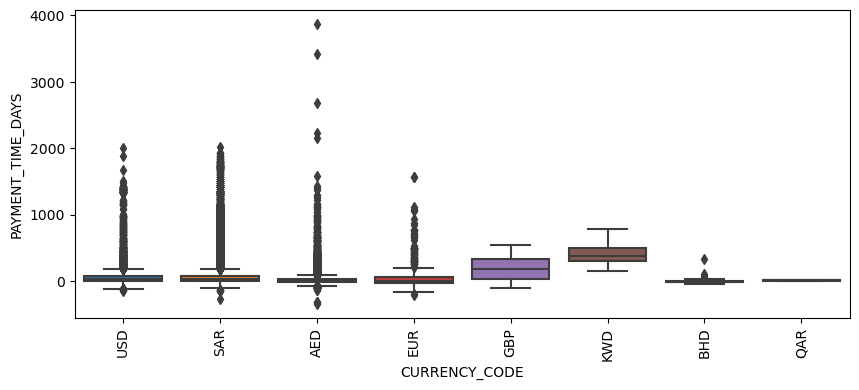

Boxplot PAYMENT_TERM Vs PAYMENT_TIME_DAYS


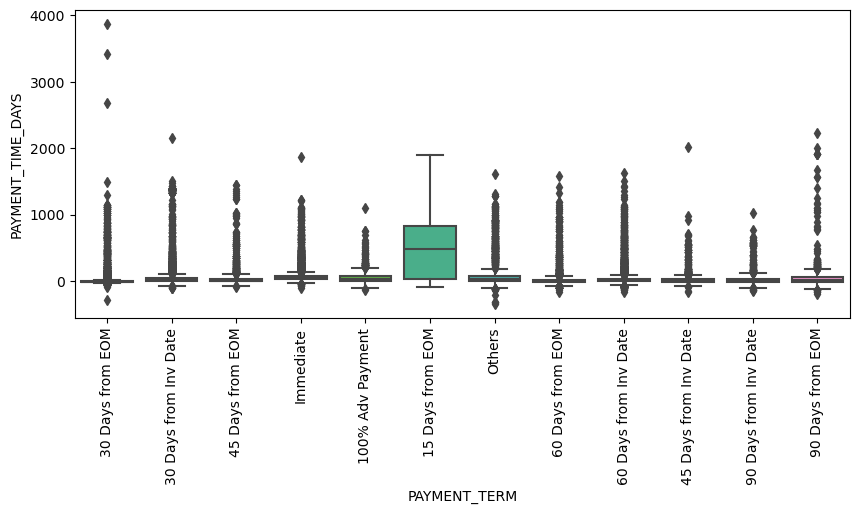

Boxplot INVOICE_CLASS Vs PAYMENT_TIME_DAYS


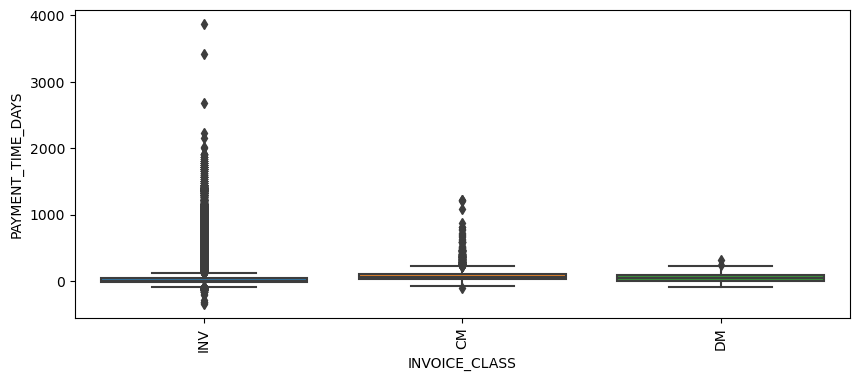

Boxplot INVOICE_CURRENCY_CODE Vs PAYMENT_TIME_DAYS


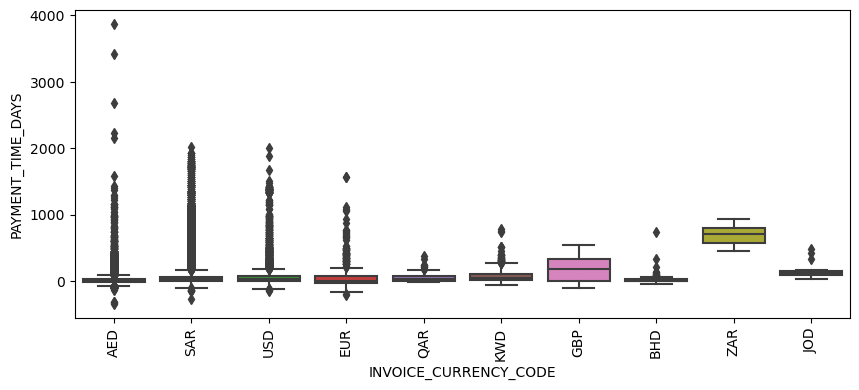

Boxplot INVOICE_TYPE Vs PAYMENT_TIME_DAYS


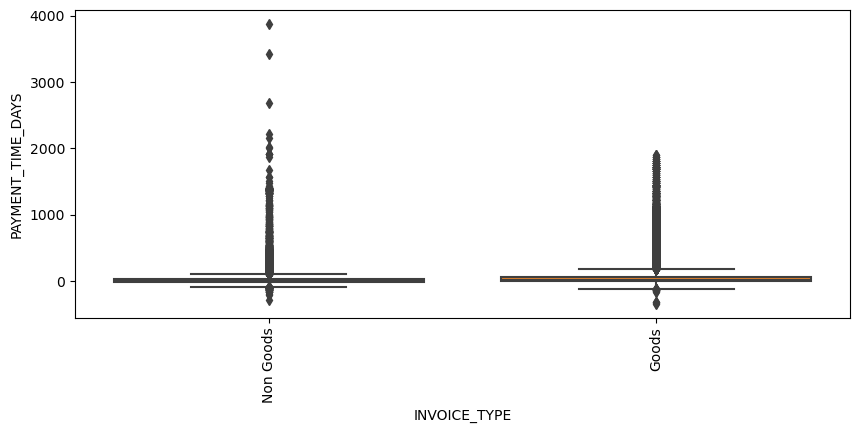

In [253]:
for i in cat_var:        
    plt.figure(figsize=(10,4))
    print("Boxplot", i, "Vs PAYMENT_TIME_DAYS")
    sns.boxplot(data=rec_payment, x= i, y="PAYMENT_TIME_DAYS")
    plt.xticks(rotation=90)
    plt.show()

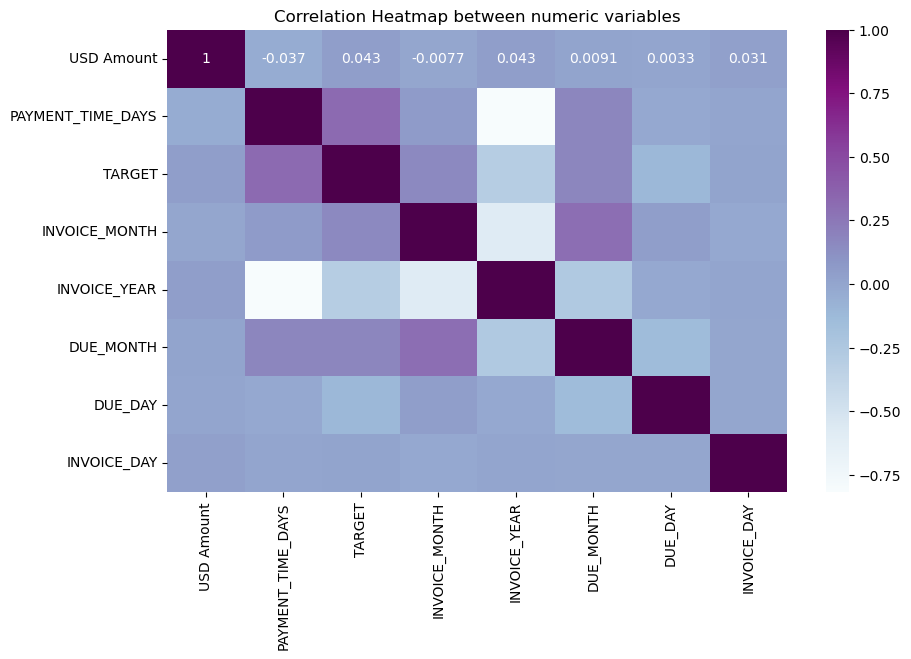

In [254]:
# Heatmap showing correlation between numeric variables
plt.figure(figsize=(10, 6))
plt.title("Correlation Heatmap between numeric variables")
sns.heatmap(data=rec_payment[num_var].corr(), annot=True, cmap="BuPu")
plt.show()

Insights from Exploratory Data Analysis (EDA) reveal the following:

WIRE payment method is predominantly favored by customers, while I/C check defaults to 100%.
Payment terms of 30 days from end of month (EOM) or invoice date are commonly chosen, but delays are notable for terms like 15 days from EOM, Immediate, and 100% Advance Payment.
Non-Goods Invoices from Schuster are nearly as frequent as Goods Invoices.
The majority of invoices are raised in AED, SAR, and USD currencies; however, a 100% delay rate is observed for JOD or ZAR currencies.
Customers paying in KWD exhibit a 100% likelihood of payment delays.
Schuster has received payments for invoices dating back to 2015 and beyond.
Invoices raised between July and September experience significant payment delays.
Payments due on Mondays and Thursdays often experience delays.
Schuster issues fewer invoices on Fridays compared to other days of the week.
The majority of Schuster's billings are for amounts less than 1 Mn, with occasional transactions exceeding 10 Mn.
The ratio of delayed to timely payments stands at 64:36.

# Segmenting Customer

In [255]:
rec_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_YEAR,INVOICE_MONTH,DUE_MONTH,DUE_DAY,INVOICE_DAY
0,WIRE,C EA Corp,2021-04-20,USD,101018.63040,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,2020,11,12,2,0
1,WIRE,RADW Corp,2021-01-31,SAR,48990.21133,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,2020,12,1,3,1
2,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,2021,1,3,0,5
3,WIRE,FARO Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020,12,1,3,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.60971,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1,17,2020,12,1,3,1


In [256]:
# Let us create the first variable for customer segmentation- Average Payment time in days
cust_seg_1=rec_payment.groupby(["CUSTOMER_NAME"])["PAYMENT_TIME_DAYS"].mean()
cust_seg_1=pd.DataFrame(cust_seg_1)
cust_seg_1.reset_index
cust_seg_1.rename(columns={"PAYMENT_TIME_DAYS":"AVERAGE_PAYMENT_DAYS"},inplace=True)
cust_seg_1.head()

,AVERAGE_PAYMENT_DAYS
CUSTOMER_NAME,
3D D Corp,-8.681529
6TH Corp,-42.666667
A3 D Corp,28.000000
ABC Corp,-74.000000
ABDU Corp,3.473118


In [257]:
# Let us create the second variable for customer segmentation- Standard Deviation Payment time
cust_seg_2=rec_payment.groupby(["CUSTOMER_NAME"])["PAYMENT_TIME_DAYS"].std()
cust_seg_2=pd.DataFrame(cust_seg_2)
cust_seg_2.reset_index
cust_seg_2.rename(columns={"PAYMENT_TIME_DAYS":"STD_DEV_PAYMENT_TIME"},inplace=True)
cust_seg_2.head()

,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,
3D D Corp,17.803787
6TH Corp,11.183321
A3 D Corp,65.053824
ABC Corp,NaN
ABDU Corp,40.854678


In [258]:
# Merge two dataframes to get the data customer wise
cust_seg=pd.merge(cust_seg_1,cust_seg_2,how="inner",on="CUSTOMER_NAME")
cust_seg.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,,
3D D Corp,-8.681529,17.803787
6TH Corp,-42.666667,11.183321
A3 D Corp,28.000000,65.053824
ABC Corp,-74.000000,NaN
ABDU Corp,3.473118,40.854678


In [259]:
cust_seg.shape

(689, 2)

In [260]:
cust_seg.isnull().mean()

AVERAGE_PAYMENT_DAYS    0.000000
STD_DEV_PAYMENT_TIME    0.164006
dtype: float64

In [261]:
cust_seg[cust_seg.STD_DEV_PAYMENT_TIME.isnull()== True]

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
CUSTOMER_NAME,,
ABC Corp,-74.0,NaN
AHIA Corp,22.0,NaN
AHL Corp,30.0,NaN
AIN Corp,-46.0,NaN
AL O Corp,-34.0,NaN
...,...,...
VICT Corp,29.0,NaN
VISA Corp,64.0,NaN
VITA Corp,22.0,NaN


In [262]:
rec_payment[rec_payment["CUSTOMER_NAME"]=="WORO Corp"]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_YEAR,INVOICE_MONTH,DUE_MONTH,DUE_DAY,INVOICE_DAY
91211,WIRE,WORO Corp,2021-05-30,AED,604.5,2021-03-22,2021-03-22,Others,INV,AED,Goods,1,69,2021,3,3,0,0


In [263]:
cust_seg["STD_DEV_PAYMENT_TIME"].fillna(0,inplace=True)
cust_seg.isnull().mean()

AVERAGE_PAYMENT_DAYS    0.0
STD_DEV_PAYMENT_TIME    0.0
dtype: float64

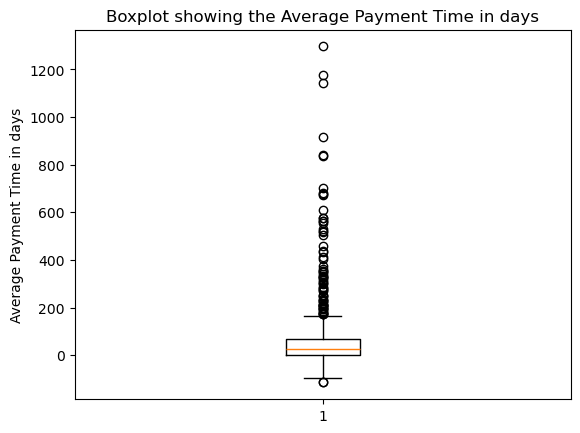

In [264]:
plt.boxplot(cust_seg["AVERAGE_PAYMENT_DAYS"])
plt.title("Boxplot showing the Average Payment Time in days")
plt.ylabel("Average Payment Time in days")
plt.show()

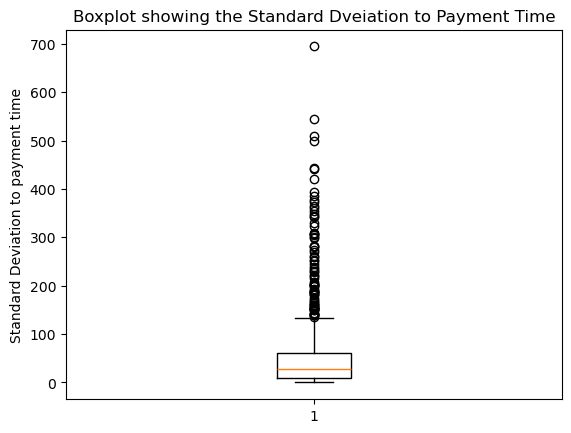

In [265]:
plt.boxplot(cust_seg["STD_DEV_PAYMENT_TIME"])
plt.title("Boxplot showing the Standard Dveiation to Payment Time")
plt.ylabel("Standard Deviation to payment time")
plt.show()

In [266]:
cluster_df=cust_seg.copy()
cluster_df.reset_index(inplace=True)
cluster_df.drop("CUSTOMER_NAME",axis=1,inplace=True)
cluster_df.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME
0,-8.681529,17.803787
1,-42.666667,11.183321
2,28.000000,65.053824
3,-74.000000,0.000000
4,3.473118,40.854678


# Clustering

In [267]:
#Importing Libraries
from sklearn.preprocessing import StandardScaler

In [268]:
scaler=StandardScaler()
cluster_df_scaled=scaler.fit_transform(cluster_df)
cluster_df_scaled.shape

(689, 2)

In [269]:
cluster_df_scaled=pd.DataFrame(cluster_df_scaled)
cluster_df_scaled.head()

,0,1
0,-0.501758,-0.453592
1,-0.737405,-0.530766
2,-0.247416,0.097198
3,-0.954664,-0.661129
4,-0.417480,-0.184889


In [270]:
#Importing required metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

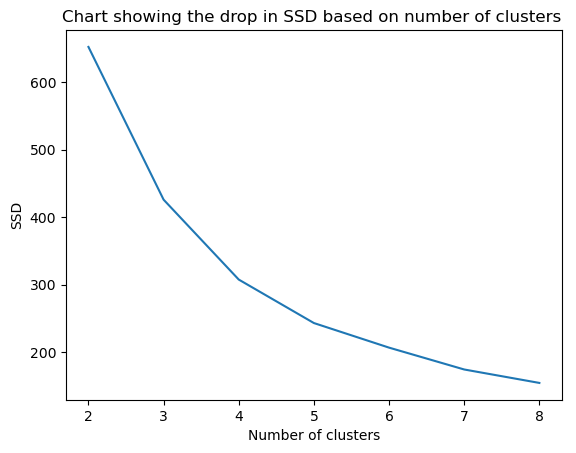

In [271]:
# Finding the optimal number of clusters
# Create a list to add the inertia- sum of squared distance
# We can see that there's a big drop from cluster 2 to 3. Hence 3 is the optimal number of cluster
ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
        kmeans=KMeans(n_clusters=num_cluster,max_iter=50)
        kmeans.fit(cluster_df_scaled)
        
        ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.xticks(ticks=(0,1,2,3,4,5,6),labels=range_n_cluster)
plt.title("Chart showing the drop in SSD based on number of clusters ")
plt.xlabel("Number of clusters")
plt.ylabel("SSD")
plt.show()

In [272]:
# Both elbow curve and silhouette score indicate that the optimal number of clusters is 3
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=42)
kmeans.fit(cluster_df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [273]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [274]:
# incorporating the cluster id into the dataframe
cust_seg["CLUSTER_ID"]=kmeans.labels_

In [275]:
# Let us look at the records in cust_seg
cust_seg.head()

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME,CLUSTER_ID
CUSTOMER_NAME,,,
3D D Corp,-8.681529,17.803787,1
6TH Corp,-42.666667,11.183321,1
A3 D Corp,28.000000,65.053824,1
ABC Corp,-74.000000,0.000000,1
ABDU Corp,3.473118,40.854678,1


In [276]:
# Let us check the count of customers in each cluster.
cust_seg.groupby("CLUSTER_ID")["CLUSTER_ID"].count()

CLUSTER_ID
0     59
1    611
2     19
Name: CLUSTER_ID, dtype: int64

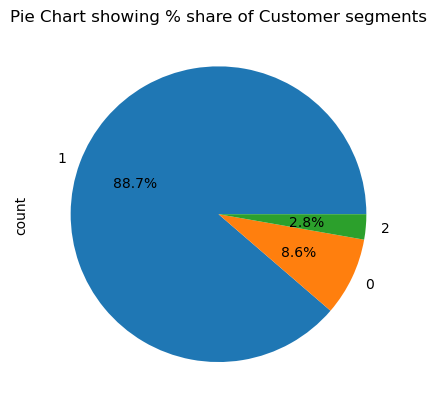

In [277]:
cust_seg["CLUSTER_ID"].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Pie Chart showing % share of Customer segments")
plt.show()

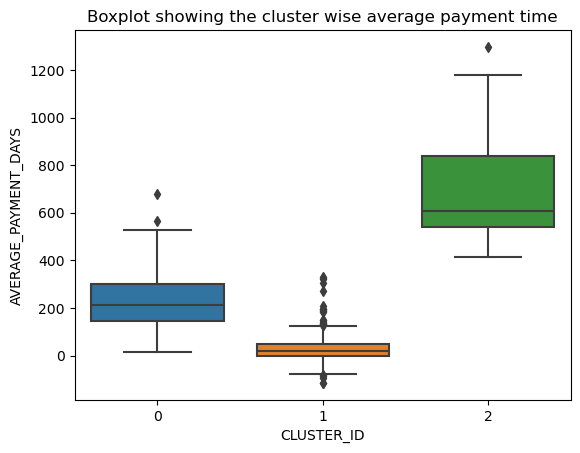

In [278]:
# Let us plot a boxplot to understand the clusters better.
sns.boxplot(x="CLUSTER_ID",y="AVERAGE_PAYMENT_DAYS",data=cust_seg)
plt.title("Boxplot showing the cluster wise average payment time")
plt.show()

In [279]:
# Cluster 0 has the customers with prolonged payment. Let us look at those customers. 
# They customers take more than a year to make payment from the due date.
cust_seg[cust_seg["CLUSTER_ID"]==0]

,AVERAGE_PAYMENT_DAYS,STD_DEV_PAYMENT_TIME,CLUSTER_ID
CUSTOMER_NAME,,,
AFRI Corp,330.022222,348.525367,0
AL G Corp,95.166667,183.444179,0
AL M Corp,286.269430,273.534847,0
AL N Corp,271.880952,329.626497,0
AL S Corp,277.159218,443.604127,0
AL Y Corp,233.363636,298.545565,0
APPA Corp,209.068966,300.674472,0
ASH Corp,403.500000,200.005682,0
ASHJ Corp,89.285714,215.242278,0


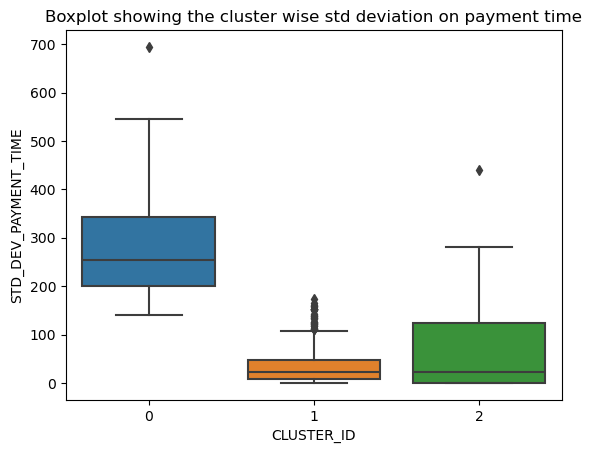

In [280]:
# Boxplot showing cluster wise standard deviation to payment time.
sns.boxplot(x="CLUSTER_ID",y="STD_DEV_PAYMENT_TIME",data=cust_seg)
plt.title("Boxplot showing the cluster wise std deviation on payment time")
plt.show()

The 3 clusters formed are :

Cluster 0: Prolonged delays with moderate stand deviation

Cluster 1: Early Payments with low std deviation

Cluster 3: Moderate Delays with high standard deviation

In [281]:
# creating a dictionary with customer name and cluster id
cust_dict=cust_seg.copy()
cust_dict.drop(["AVERAGE_PAYMENT_DAYS","STD_DEV_PAYMENT_TIME"],axis=1,inplace=True)
cust_dict.head()

,CLUSTER_ID
CUSTOMER_NAME,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1


In [282]:
cust_dict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 3D D Corp to ZV F Corp
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CLUSTER_ID  689 non-null    int32
dtypes: int32(1)
memory usage: 24.2+ KB


In [283]:
# We will merge the cust_dict with the rec_payment_data
merged_df=pd.merge(rec_payment,cust_dict, how="inner",on="CUSTOMER_NAME")
merged_df.shape

(42058, 19)

In [284]:
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,TARGET,PAYMENT_TIME_DAYS,INVOICE_YEAR,INVOICE_MONTH,DUE_MONTH,DUE_DAY,INVOICE_DAY,CLUSTER_ID
0,WIRE,C EA Corp,2021-04-20,USD,101018.630400,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1,111,2020,11,12,2,0,1
1,WIRE,C EA Corp,2021-05-19,AED,2859.090000,2021-04-07,2021-05-30,30 Days from EOM,INV,AED,Non Goods,0,-11,2021,4,5,6,2,1
2,WIRE,C EA Corp,2021-02-20,AED,10.578625,2020-11-26,2020-12-26,30 Days from Inv Date,INV,AED,Non Goods,1,56,2020,11,12,5,3,1
3,WIRE,RADW Corp,2021-01-31,SAR,48990.211330,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1,3,2020,12,1,3,1,1
4,WIRE,RADW Corp,2021-01-31,SAR,41991.609710,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0,-29,2021,1,3,0,5,1


In [285]:
# Now that we can proceed to the next step, let us see what are the columns that are irrelevant for building the model
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE', 'CURRENCY_CODE',
       'USD Amount', 'INVOICE_CREATION_DATE', 'DUE_DATE', 'PAYMENT_TERM',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'TARGET',
       'PAYMENT_TIME_DAYS', 'INVOICE_YEAR', 'INVOICE_MONTH', 'DUE_MONTH',
       'DUE_DAY', 'INVOICE_DAY', 'CLUSTER_ID'],
      dtype='object')

In [286]:
# Let us also check the columns in open invoices file to see what columns need to be retained in rec_payment_data.
openinv_data.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [287]:
# dropping the columns that are not required/cannot be used for building the model
merged_df.drop(['RECEIPT_METHOD', 'CUSTOMER_NAME','RECEIPT_DATE',
       'CURRENCY_CODE', 'INVOICE_CREATION_DATE', 'DUE_DATE', 
       'INVOICE_TYPE', 'PAYMENT_TIME_DAYS',"INVOICE_YEAR","INVOICE_MONTH","INVOICE_DAY"],axis=1,inplace=True)
merged_df.shape

(42058, 8)

In [288]:
# Let us check the unique records to have an idea of the dummy variables required.
merged_df.nunique()

USD Amount               7819
PAYMENT_TERM               12
INVOICE_CLASS               3
INVOICE_CURRENCY_CODE      10
TARGET                      2
DUE_MONTH                  12
DUE_DAY                     7
CLUSTER_ID                  3
dtype: int64

In [289]:
# Creation of dummy variable
dummy1=pd.get_dummies(merged_df[["PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE"]],drop_first=True)

In [290]:
# Merging the dummy variables with the main dataframe.
merged_df=pd.concat([merged_df,dummy1],axis=1)
merged_df.shape

(42058, 30)

In [291]:
# checking the dataframe
merged_df.head()

,USD Amount,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,101018.630400,30 Days from EOM,INV,AED,1,12,2,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2859.090000,30 Days from EOM,INV,AED,0,5,6,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,10.578625,30 Days from Inv Date,INV,AED,1,12,5,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,48990.211330,30 Days from Inv Date,INV,SAR,1,1,3,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,41991.609710,30 Days from Inv Date,INV,SAR,0,3,0,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


In [292]:
# dropping the columns after creation of dummy variables
merged_df.drop(["PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE"],axis=1,inplace=True)
merged_df.shape

(42058, 27)

In [293]:
merged_df.head()

,USD Amount,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,101018.630400,1,12,2,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2859.090000,0,5,6,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,10.578625,1,12,5,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,48990.211330,1,1,3,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,41991.609710,0,3,0,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


In [294]:
dummy2=pd.get_dummies(merged_df["DUE_MONTH"],prefix="DUE_MONTH",drop_first=True)
dummy2.head()

,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False


In [295]:
merged_df=pd.concat([merged_df,dummy2],axis=1)
merged_df.shape

(42058, 38)

In [296]:
dummy3=pd.get_dummies(merged_df["DUE_DAY"],prefix="DUE_DAY",drop_first=True)
dummy3.head()

,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6
0,False,True,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,True,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False


In [297]:
merged_df=pd.concat([merged_df,dummy3],axis=1)
merged_df.shape

(42058, 44)

In [298]:
dummy4=pd.get_dummies(merged_df["CLUSTER_ID"],prefix="CLUSTER_ID",drop_first=True)
dummy4.head()

,CLUSTER_ID_1,CLUSTER_ID_2
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [299]:
merged_df=pd.concat([merged_df,dummy4],axis=1)
merged_df.head()

,USD Amount,TARGET,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,101018.630400,1,12,2,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False
1,2859.090000,0,5,6,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,10.578625,1,12,5,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False
3,48990.211330,1,1,3,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,41991.609710,0,3,0,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [300]:
merged_df.drop(["DUE_DAY","DUE_MONTH","CLUSTER_ID"],axis=1,inplace=True)
merged_df.shape

(42058, 43)

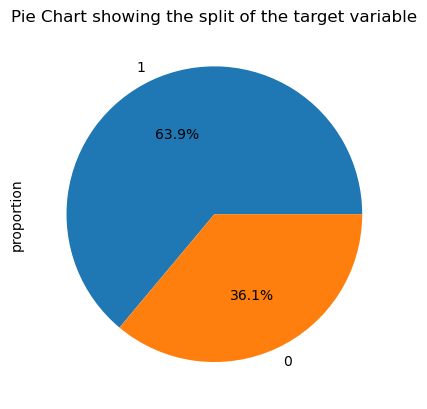

In [301]:
#Checking Data Imbalance

np.round(merged_df.TARGET.value_counts(normalize=True)*100,2).plot.pie(autopct="%.1f%%")
plt.title("Pie Chart showing the split of the target variable")
plt.show()

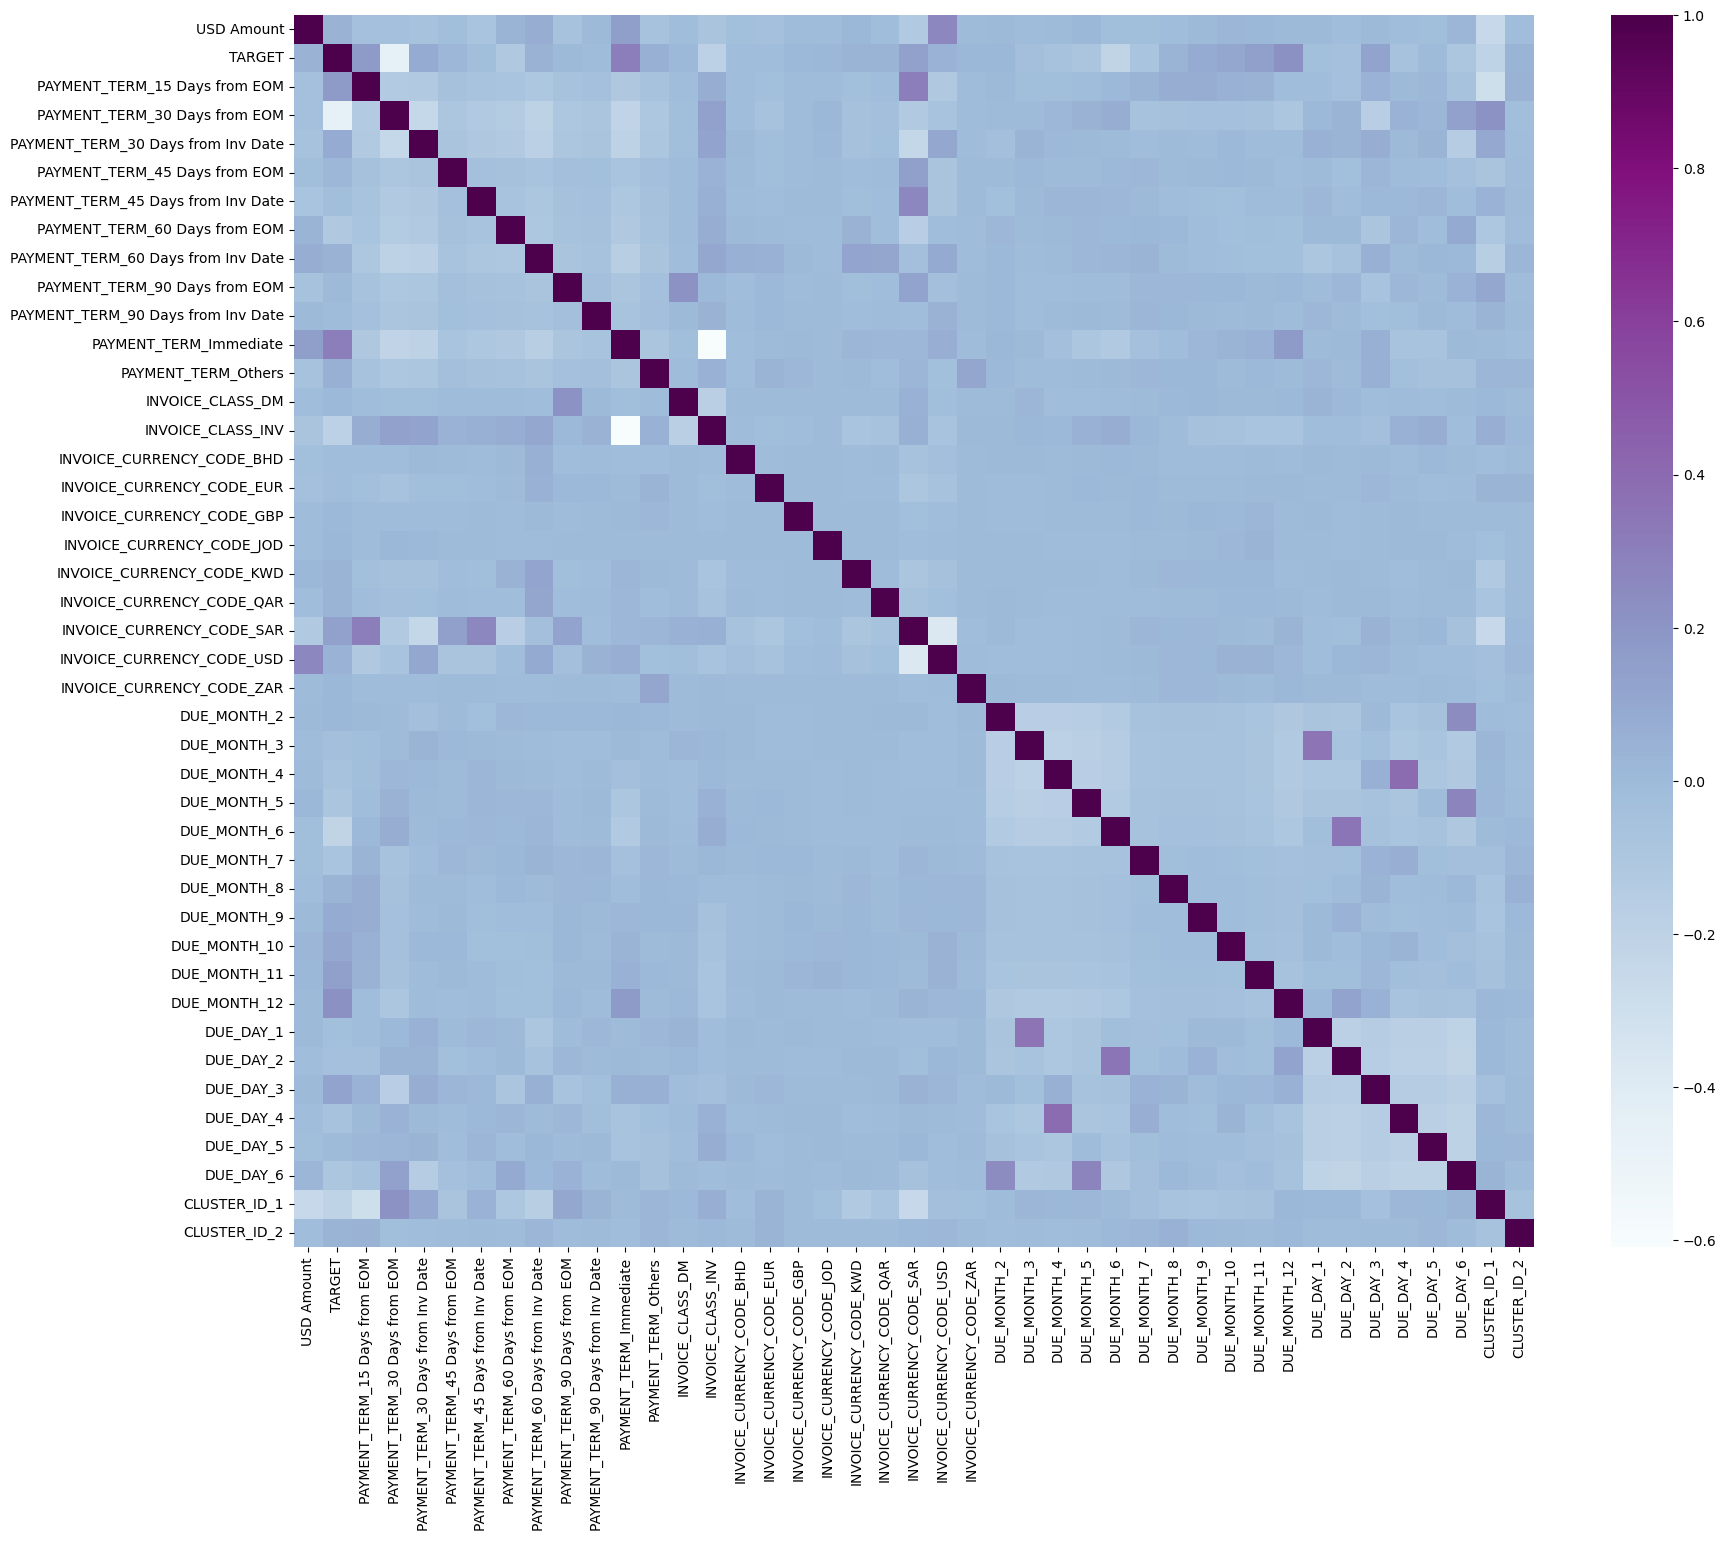

In [302]:
plt.figure(figsize=(20,16))
sns.heatmap(merged_df.corr(),cmap="BuPu")
plt.show()

# Model Building - Logistic Regression and Evaluation

# Train Test Split

In [303]:
X=merged_df.drop("TARGET",axis=1)
y=merged_df["TARGET"]
X.shape,y.shape

((42058, 42), (42058,))

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29440, 42), (12618, 42), (29440,), (12618,))

In [306]:
y_train.value_counts(normalize=True)

TARGET
1    0.639096
0    0.360904
Name: proportion, dtype: float64

In [307]:
y_test.value_counts(normalize=True)

TARGET
1    0.639087
0    0.360913
Name: proportion, dtype: float64

In [308]:
#Improting Libraries
from sklearn.preprocessing import MinMaxScaler

In [309]:
scaler=MinMaxScaler()

In [310]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [311]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.028754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000614,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.014069,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000655,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.103657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [312]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.004923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000123,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.024624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.003531,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.210528,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


The data is prepared for model construction, with the initial focus on developing a logistic regression model.

In [313]:
#importing Libraries
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

Selecting number of features using RFECV

In [314]:
logreg=LogisticRegression(random_state=42,max_iter=200)

In [315]:
rfecv=RFECV(estimator=logreg,cv=5,n_jobs=-1)
rfecv.fit(X_train_scaled,y_train)

RFECV(cv=5, estimator=LogisticRegression(max_iter=200, random_state=42),
      n_jobs=-1)

In [316]:
num_features=X_train_scaled.shape[1]
num_features

42

Text(0, 0.5, 'Cross-validation score')

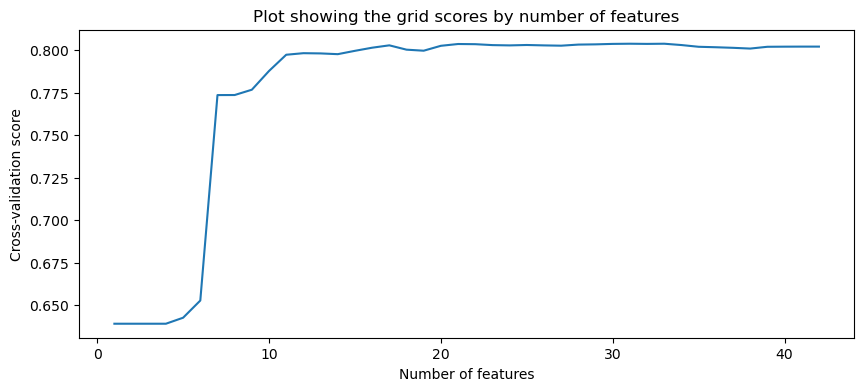

In [317]:
if hasattr(rfecv, 'grid_scores_'):  # For older versions
    grid_scores = rfecv.grid_scores_
elif hasattr(rfecv, 'cv_results_'):  # For newer versions, adapt as necessary
    grid_scores = rfecv.cv_results_['mean_test_score']  # Adjust based on the actual structure
else:
    raise AttributeError("RFECV object does not have the expected attribute.")

plt.figure(figsize=(10, 4))
plt.plot(range(1, num_features + 1), grid_scores)
plt.title("Plot showing the grid scores by number of features")
plt.xlabel("Number of features")
plt.ylabel("Cross-validation score")

In [318]:
rfecv.n_features_

31

In [319]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True])

In [320]:
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1, 11,
        1,  1,  4,  3,  5,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        9,  1, 12,  7,  8, 10,  1,  1])

In [321]:
cols_to_keep=X_train_scaled.columns[rfecv.support_]
cols_to_keep

Index(['USD Amount', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Immediate', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'INVOICE_CURRENCY_CODE_BHD', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_KWD',
       'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_2', 'DUE_MONTH_3',
       'DUE_MONTH_4', 'DUE_MONTH_5', 'DUE_MONTH_6', 'DUE_MONTH_7',
       'DUE_MONTH_9', 'DUE_MONTH_10', 'DUE_MONTH_11', 'DUE_MONTH_12',
       'DUE_DAY_2', 'CLUSTER_ID_1', 'CLUSTER_ID_2'],
      dtype='object')

# Buidling the first model

In [322]:
# importing RFE from scikit learn
from sklearn.feature_selection import RFE

In [323]:
# Now that we know 14 is the best number of features, let us build the first model using 14 features
rfe1=RFE(estimator=logreg,n_features_to_select=14)
rfe1.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=14)

In [324]:
# Finding the columns in rfe1.
cols_to_keep=X_train_scaled.columns[rfe1.support_]
cols_to_keep

Index(['PAYMENT_TERM_15 Days from EOM', 'PAYMENT_TERM_30 Days from EOM',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_Immediate',
       'INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_JOD',
       'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_6', 'DUE_MONTH_7',
       'DUE_MONTH_9', 'DUE_MONTH_10', 'DUE_MONTH_11', 'DUE_MONTH_12',
       'CLUSTER_ID_2'],
      dtype='object')

In [325]:
# Keeping the required columns in X_train and X_test
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]
X_train.shape,X_test.shape

((29440, 14), (12618, 14))

In [326]:
import statsmodels.api as sm

In [327]:
# Adding a constant
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [328]:
# building the first model
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29425
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12310.
Date:                Tue, 05 Mar 2024   Deviance:                       24620.
Time:                        21:56:45   Pearson chi2:                 2.65e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3760
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.8608      0.021     41.527      0.000       0.820       0.901
PAYMENT_TERM_15 Days from EOM     2.4854      0.125     19.918      0.000       2.241       2.730
PAYMENT_TERM_30 Days from EOM    -2.4326      0.042    -58.216      0.000      -2.515      -2.351
PAYMENT_TERM_60 Days from EOM    -1.1812      0.052    -22.744      0.000      -1.283      -1.079
PAYMENT_TERM_Immediate            2.8298      0.113     25.142      0.000       2.609       3.050
INVOICE_CURRENCY_CODE_EUR        -0.9573      0.132     -7.233      0.000      -1.217      -0.698
INVOICE_CURRENCY_CODE_JOD        27.9494   2.18e+05      0.000      1.000   -4.26e+05    4.26e+05
INVOICE_CURRENCY_CODE_ZAR        26.9669   2.23e+05      0.000      1.000   -4.36e+05    4.36e+05
DUE_MONTH_6                      -1.1287      0.048    -23.607      0.000      -1.222      -1.035
DUE_MONTH_7                      -1.4593      0.096    -15.161      0.000      -1.648      -1.271
DUE_MONTH_9                       3.2499      0.350      9.278      0.000       2.563       3.936
DUE_MONTH_10                      5.9209      1.005      5.892      0.000       3.951       7.890
DUE_MONTH_11                     28.0334   2.65e+04      0.001      0.999   -5.18e+04    5.19e+04
DUE_MONTH_12                     27.8736   1.76e+04      0.002      0.999   -3.44e+04    3.45e+04
CLUSTER_ID_2                     27.4049   1.09e+05      0.000      1.000   -2.13e+05    2.13e+05
=================================================================================================
"""

In the model comprising 14 features, certain variables exhibit high p-values. To address this, we will construct a second model by excluding one variable, specifically, INVOICE_CURRENCY_CODE_JOD, as its p-value is 1.

# Second Model

In [329]:
# Dropping the variable "INVOICE_CURRENCY_CODE_JOD" from train and test dataset
X_train_sm=X_train_sm.drop("INVOICE_CURRENCY_CODE_JOD",axis=1)
X_test_sm=X_test_sm.drop("INVOICE_CURRENCY_CODE_JOD",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 14), (12618, 14))

In [330]:
# building the second model
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [331]:
#summary results of the second model
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29426
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12314.
Date:                Tue, 05 Mar 2024   Deviance:                       24629.
Time:                        21:56:46   Pearson chi2:                 2.65e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.8611      0.021     41.542      0.000       0.820       0.902
PAYMENT_TERM_15 Days from EOM     2.4853      0.125     19.916      0.000       2.241       2.730
PAYMENT_TERM_30 Days from EOM    -2.4305      0.042    -58.210      0.000      -2.512      -2.349
PAYMENT_TERM_60 Days from EOM    -1.1815      0.052    -22.748      0.000      -1.283      -1.080
PAYMENT_TERM_Immediate            2.8296      0.113     25.140      0.000       2.609       3.050
INVOICE_CURRENCY_CODE_EUR        -0.9576      0.132     -7.235      0.000      -1.217      -0.698
INVOICE_CURRENCY_CODE_ZAR        26.9661   2.23e+05      0.000      1.000   -4.36e+05    4.36e+05
DUE_MONTH_6                      -1.1292      0.048    -23.619      0.000      -1.223      -1.035
DUE_MONTH_7                      -1.4596      0.096    -15.164      0.000      -1.648      -1.271
DUE_MONTH_9                       3.2677      0.350      9.331      0.000       2.581       3.954
DUE_MONTH_10                      5.9447      1.005      5.916      0.000       3.975       7.914
DUE_MONTH_11                     28.0484   2.64e+04      0.001      0.999   -5.18e+04    5.18e+04
DUE_MONTH_12                     27.8727   1.76e+04      0.002      0.999   -3.44e+04    3.45e+04
CLUSTER_ID_2                     27.4038   1.09e+05      0.000      1.000   -2.13e+05    2.13e+05
=================================================================================================
"""

Since the p value of all variables is not below 0.05, we will build the third model dropping INVOICE_CURRENCY_CODE_ZAR

# Third Model

In [332]:
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [333]:
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29426
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12314.
Date:                Tue, 05 Mar 2024   Deviance:                       24629.
Time:                        21:56:46   Pearson chi2:                 2.65e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.8611      0.021     41.542      0.000       0.820       0.902
PAYMENT_TERM_15 Days from EOM     2.4853      0.125     19.916      0.000       2.241       2.730
PAYMENT_TERM_30 Days from EOM    -2.4305      0.042    -58.210      0.000      -2.512      -2.349
PAYMENT_TERM_60 Days from EOM    -1.1815      0.052    -22.748      0.000      -1.283      -1.080
PAYMENT_TERM_Immediate            2.8296      0.113     25.140      0.000       2.609       3.050
INVOICE_CURRENCY_CODE_EUR        -0.9576      0.132     -7.235      0.000      -1.217      -0.698
INVOICE_CURRENCY_CODE_ZAR        26.9661   2.23e+05      0.000      1.000   -4.36e+05    4.36e+05
DUE_MONTH_6                      -1.1292      0.048    -23.619      0.000      -1.223      -1.035
DUE_MONTH_7                      -1.4596      0.096    -15.164      0.000      -1.648      -1.271
DUE_MONTH_9                       3.2677      0.350      9.331      0.000       2.581       3.954
DUE_MONTH_10                      5.9447      1.005      5.916      0.000       3.975       7.914
DUE_MONTH_11                     28.0484   2.64e+04      0.001      0.999   -5.18e+04    5.18e+04
DUE_MONTH_12                     27.8727   1.76e+04      0.002      0.999   -3.44e+04    3.45e+04
CLUSTER_ID_2                     27.4038   1.09e+05      0.000      1.000   -2.13e+05    2.13e+05
=================================================================================================
"""

# Fourth Model

In [339]:
if "CLUSTER_ID_2" in X_train_sm.columns:
    X_train_sm = X_train_sm.drop("CLUSTER_ID_2", axis=1)
if "CLUSTER_ID_2" in X_test_sm.columns:
    X_test_sm = X_test_sm.drop("CLUSTER_ID_2", axis=1)

print(X_train_sm.shape, X_test_sm.shape)

(29440, 13) (12618, 13)


In [340]:
# building the fourth model
model4=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [341]:
#summary results of the fourth model
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29427
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12331.
Date:                Tue, 05 Mar 2024   Deviance:                       24662.
Time:                        21:59:48   Pearson chi2:                 2.66e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3751
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.8633      0.021     41.661      0.000       0.823       0.904
PAYMENT_TERM_15 Days from EOM     2.5030      0.125     20.056      0.000       2.258       2.748
PAYMENT_TERM_30 Days from EOM    -2.4319      0.042    -58.273      0.000      -2.514      -2.350
PAYMENT_TERM_60 Days from EOM    -1.1842      0.052    -22.806      0.000      -1.286      -1.082
PAYMENT_TERM_Immediate            2.8262      0.113     25.112      0.000       2.606       3.047
INVOICE_CURRENCY_CODE_EUR        -0.9160      0.131     -7.010      0.000      -1.172      -0.660
INVOICE_CURRENCY_CODE_ZAR        26.9636   2.22e+05      0.000      1.000   -4.36e+05    4.36e+05
DUE_MONTH_6                      -1.1252      0.048    -23.580      0.000      -1.219      -1.032
DUE_MONTH_7                      -1.4590      0.096    -15.184      0.000      -1.647      -1.271
DUE_MONTH_9                       3.2752      0.350      9.358      0.000       2.589       3.961
DUE_MONTH_10                      5.9448      1.005      5.917      0.000       3.975       7.914
DUE_MONTH_11                     28.0480   2.64e+04      0.001      0.999   -5.18e+04    5.18e+04
DUE_MONTH_12                     27.8734   1.76e+04      0.002      0.999   -3.45e+04    3.45e+04
=================================================================================================
"""

# Fifth Model

In [342]:
# Dropping the variable "DUE_MONTH_11" from train and test dataset
X_train_sm=X_train_sm.drop("DUE_MONTH_11",axis=1)
X_test_sm=X_test_sm.drop("DUE_MONTH_11",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 12), (12618, 12))

In [343]:
# building the fifth model
model5=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [344]:
#summary results of the fifth model
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29428
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12725.
Date:                Tue, 05 Mar 2024   Deviance:                       25450.
Time:                        21:59:57   Pearson chi2:                 2.75e+04
No. Iterations:                    27   Pseudo R-squ. (CS):             0.3581
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.9215      0.021     44.822      0.000       0.881       0.962
PAYMENT_TERM_15 Days from EOM     2.5306      0.125     20.315      0.000       2.286       2.775
PAYMENT_TERM_30 Days from EOM    -2.3689      0.040    -58.974      0.000      -2.448      -2.290
PAYMENT_TERM_60 Days from EOM    -1.1785      0.051    -23.040      0.000      -1.279      -1.078
PAYMENT_TERM_Immediate            2.8477      0.112     25.338      0.000       2.627       3.068
INVOICE_CURRENCY_CODE_EUR        -0.8470      0.127     -6.678      0.000      -1.096      -0.598
INVOICE_CURRENCY_CODE_ZAR        26.9121   2.23e+05      0.000      1.000   -4.37e+05    4.37e+05
DUE_MONTH_6                      -1.1926      0.048    -25.083      0.000      -1.286      -1.099
DUE_MONTH_7                      -1.5224      0.096    -15.842      0.000      -1.711      -1.334
DUE_MONTH_9                       3.1847      0.349      9.118      0.000       2.500       3.869
DUE_MONTH_10                      5.8440      1.005      5.818      0.000       3.875       7.813
DUE_MONTH_12                     27.7767   1.76e+04      0.002      0.999   -3.45e+04    3.46e+04
=================================================================================================
"""

# Sixth Model

In [345]:
# Dropping the variable "DUE_MONTH_12" from train and test dataset
X_train_sm=X_train_sm.drop("DUE_MONTH_12",axis=1)
X_test_sm=X_test_sm.drop("DUE_MONTH_12",axis=1)
X_train_sm.shape,X_test_sm.shape

((29440, 11), (12618, 11))

In [346]:
# building the sixth model
model6=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())

In [347]:
#summary results of the sixth model
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29440
Model:                            GLM   Df Residuals:                    29429
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13455.
Date:                Tue, 05 Mar 2024   Deviance:                       26910.
Time:                        22:00:02   Pearson chi2:                 2.97e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3255
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.0410      0.020     51.451      0.000       1.001       1.081
PAYMENT_TERM_15 Days from EOM     2.5160      0.125     20.198      0.000       2.272       2.760
PAYMENT_TERM_30 Days from EOM    -2.3122      0.038    -60.715      0.000      -2.387      -2.238
PAYMENT_TERM_60 Days from EOM    -1.1594      0.050    -23.400      0.000      -1.257      -1.062
PAYMENT_TERM_Immediate            2.9436      0.112     26.271      0.000       2.724       3.163
INVOICE_CURRENCY_CODE_EUR        -0.7377      0.121     -6.075      0.000      -0.976      -0.500
INVOICE_CURRENCY_CODE_ZAR        21.3191    1.2e+04      0.002      0.999   -2.36e+04    2.36e+04
DUE_MONTH_6                      -1.3216      0.047    -27.930      0.000      -1.414      -1.229
DUE_MONTH_7                      -1.6473      0.096    -17.156      0.000      -1.835      -1.459
DUE_MONTH_9                       3.0340      0.349      8.701      0.000       2.351       3.717
DUE_MONTH_10                      5.6841      1.004      5.660      0.000       3.716       7.652
=================================================================================================
"""

We can see that the p values of all variables is less than 0.05. Let us now check if the VIF is less than 5



In [348]:
# check the VIF's for the same as all values are less than 0.05
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Features"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Features,VIF
0,const,2.229308
1,PAYMENT_TERM_15 Days from EOM,1.065445
2,PAYMENT_TERM_30 Days from EOM,1.130027
3,PAYMENT_TERM_60 Days from EOM,1.059898
4,PAYMENT_TERM_Immediate,1.121873
5,INVOICE_CURRENCY_CODE_EUR,1.004941
6,INVOICE_CURRENCY_CODE_ZAR,1.000754
7,DUE_MONTH_6,1.024593
8,DUE_MONTH_7,1.010645
9,DUE_MONTH_9,1.009096


In [349]:
# Let us build the model with 9 features using sklearn and check the cross_val_score
rfe9=RFE(estimator=logreg,n_features_to_select=9)
rfe9.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=9)

While we have the option to compute accuracy, precision, and recall metrics on the training set, let's opt for cross-validation scores to assess how the model might perform on the test data.

In [350]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [351]:
# Accuracy using cross val score
cross_val_score(rfe9,X_train,y_train,cv=5,n_jobs=-1).mean()

0.7768342391304348

In [352]:
# recall using cross val score
cross_val_score(rfe9,X_train,y_train,cv=5,n_jobs=-1,scoring="recall").mean()

0.9509965453095933

In [353]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [354]:
# Predictions on the training set
y_train_pred_lr=result6.predict(X_train_sm)
y_train_pred_lr.shape

(29440,)

In [355]:
# Creating a dataframe with the Actual Class, Predicted Probability and Predicted Class on training set 
train_lr=pd.DataFrame()
train_lr["Predicted_Prob"]=y_train_pred_lr
train_lr["Actual_Class"]=y_train.values
train_lr["Predicted_Class"]=np.where(train_lr["Predicted_Prob"]>0.5,1,0)
train_lr.head()

,Predicted_Prob,Actual_Class,Predicted_Class
0,0.739039,0,1
1,0.219044,0,0
2,0.739039,1,1
3,0.739039,1,1
4,0.470420,0,0


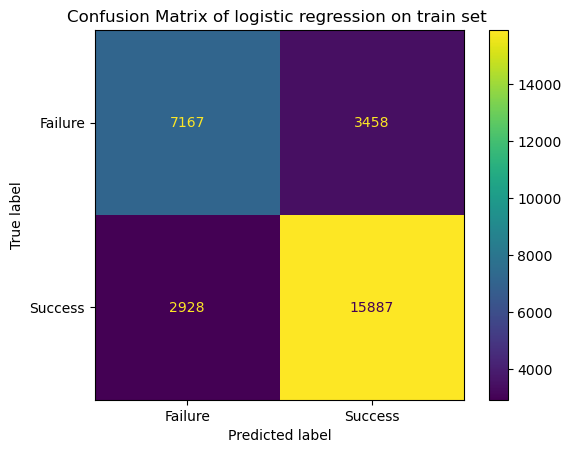

In [356]:
# confusion matrix of train set
confusion_matrix=metrics.confusion_matrix(train_lr["Actual_Class"],train_lr["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on train set ")
plt.show()

In [357]:
# Let us check the accuracy on the train set
metrics.accuracy_score(train_lr["Actual_Class"],train_lr["Predicted_Class"])

0.7830842391304348

In [358]:
print(metrics.classification_report(train_lr["Actual_Class"],train_lr["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69     10625
           1       0.82      0.84      0.83     18815

    accuracy                           0.78     29440
   macro avg       0.77      0.76      0.76     29440
weighted avg       0.78      0.78      0.78     29440



Model 6 achieves an accuracy of 78.26% on the training set, with a recall/sensitivity score of 89%, specificity of 60%, and precision of 80%. These results appear promising. Now, let's proceed to visualize the ROC Curve.

In [359]:
# Creating function for ROC plot
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver operating characteristic')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [360]:
fpr, tpr, thresholds = metrics.roc_curve(train_lr["Actual_Class"], train_lr["Predicted_Prob"], drop_intermediate = False )

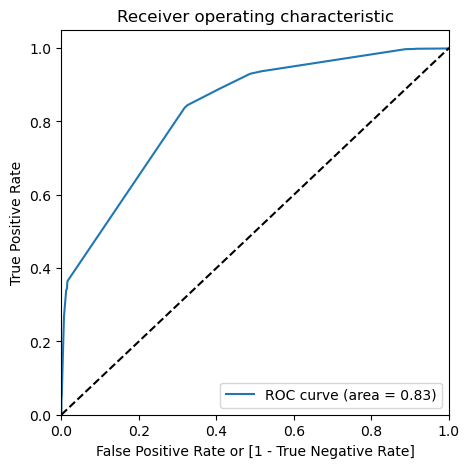

In [361]:
# ROC curve shows that this is a decent model
draw_roc(train_lr.Actual_Class, train_lr["Predicted_Prob"])

In [362]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_lr[i]= train_lr["Predicted_Prob"].map(lambda x: 1 if x > i else 0)
train_lr.head()

,Predicted_Prob,Actual_Class,Predicted_Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.739039,0,1,1,1,1,1,1,1,1,1,0,0
1,0.219044,0,0,1,1,1,0,0,0,0,0,0,0
2,0.739039,1,1,1,1,1,1,1,1,1,1,0,0
3,0.739039,1,1,1,1,1,1,1,1,1,1,0,0
4,0.470420,0,0,1,1,1,1,1,0,0,0,0,0


In [363]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_lr["Actual_Class"], train_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.639096  1.000000  0.000000
0.1   0.1  0.668614  0.998140  0.085082
0.2   0.2  0.677140  0.997024  0.110682
0.3   0.3  0.773675  0.936062  0.486118
0.4   0.4  0.779416  0.929896  0.512941
0.5   0.5  0.783084  0.844379  0.674541
0.6   0.6  0.781182  0.837204  0.681976
0.7   0.7  0.781182  0.837204  0.681976
0.8   0.8  0.587976  0.364071  0.984471
0.9   0.9  0.584715  0.358703  0.984941


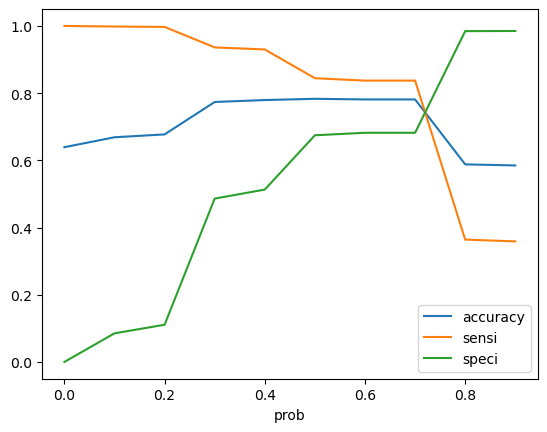

In [364]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The suggested optimal cutoff point from the plot is approximately 0.62. However, there's a noticeable drop in sensitivity from 0.885 to 0.844 when adjusting the probability threshold from 0.5 to 0.6. Therefore, we will maintain the threshold at 0.5 for predictions.

Now, let's explore the evaluation metrics for a Random Forest model.

Model Building - Random Forest, Hyperparameter Tuning, and Evaluation:

In hyperparameter tuning, we aim to find the best combination of parameters that yield a well-performing model. We will utilize GridSearch CV to systematically explore various parameter combinations and identify the optimal settings for building the model.

In [365]:
# import the required methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [366]:
# instantiate
rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

In [367]:
# Define the values for different parameters
hyper_params = {'max_depth': [5, 10, 15, 20],
                'max_features': [5, 10, 15, 20],
                'min_samples_leaf': [200, 500, 1000, 1500],
                'n_estimators': [25, 50, 80, 100]
               }

In [368]:
# Using GRIDSEARCHCV
rf_cv=GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1)

In [369]:
# let us see the shape of data which is to be used
X_train_scaled.shape,X_test_scaled.shape

((29440, 42), (12618, 42))

In [ ]:
# fitting on the train data
rf_cv.fit(X_train_scaled,y_train)

In [371]:
# finding the best random forest
rf_best=rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=20, min_samples_leaf=200,
                       n_estimators=25, n_jobs=-1, oob_score=True,
                       random_state=42)

In [372]:
# finding the score of the best random forest
rf_cv.best_score_

0.7987092391304348

In [373]:
# Putting the results of grid serach in a dataframe
cv_df=pd.DataFrame(rf_cv.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.997585,0.052936,0.060615,0.016248,5,5,200,25,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.788723,0.776834,0.775306,0.773777,0.778533,0.778635,0.005286,93
1,1.303462,0.265810,0.196825,0.197961,5,5,200,50,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.785326,0.771909,0.772079,0.772079,0.777004,0.775679,0.005195,113
2,2.087735,0.208790,0.203612,0.173111,5,5,200,80,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.785326,0.774626,0.773098,0.770550,0.777174,0.776155,0.005064,111
3,2.497314,0.364803,0.278082,0.088178,5,5,200,100,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.786345,0.775306,0.773607,0.773438,0.778023,0.777344,0.004793,104
4,0.758395,0.236571,0.229465,0.120436,5,5,500,25,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.778193,0.767833,0.770041,0.770550,0.774117,0.772147,0.003634,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,5.752462,0.773609,0.541350,0.384406,20,20,1000,100,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.772079,0.760360,0.758662,0.759511,0.763417,0.762806,0.004907,170
252,1.906779,1.012470,0.363850,0.250964,20,20,1500,25,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.766814,0.760360,0.758492,0.757473,0.762058,0.761039,0.003288,206
253,2.169393,0.222429,0.930098,0.191933,20,20,1500,50,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.766814,0.760360,0.758492,0.757473,0.762058,0.761039,0.003288,206
254,3.810986,0.200714,0.830508,0.333545,20,20,1500,80,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.766814,0.760360,0.758492,0.757473,0.762058,0.761039,0.003288,206


In [374]:
# sorting the values in cv_df
cv_df.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
240,1.968239,0.309206,0.838979,0.388293,20,20,200,25,"{'max_depth': 20, 'max_features': 20, 'min_sam...",0.801630,0.799423,0.799253,0.789912,0.803329,0.798709,0.004649,1
112,1.543854,0.235063,0.620858,0.419358,10,20,200,25,"{'max_depth': 10, 'max_features': 20, 'min_sam...",0.803499,0.795856,0.796705,0.793988,0.800781,0.798166,0.003470,2
177,4.085465,0.075739,1.796639,0.389126,15,20,200,50,"{'max_depth': 15, 'max_features': 20, 'min_sam...",0.800272,0.794327,0.801461,0.788043,0.803499,0.797520,0.005636,3
176,2.398506,0.206272,0.916897,0.719037,15,20,200,25,"{'max_depth': 15, 'max_features': 20, 'min_sam...",0.799762,0.795856,0.801291,0.785836,0.804178,0.797385,0.006368,4
147,4.753093,0.466771,0.307501,0.126877,15,10,200,100,"{'max_depth': 15, 'max_features': 10, 'min_sam...",0.797045,0.799083,0.796875,0.794497,0.798234,0.797147,0.001551,5


# Building Random Forest

In [375]:
rf_best.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=20, max_features=20, min_samples_leaf=200,
                       n_estimators=25, n_jobs=-1, oob_score=True,
                       random_state=42)

In [376]:
cross_val_score(rf_best,X_train_scaled,y_train,cv=5,n_jobs=-1).mean()

0.7987092391304348

In [377]:
rf_best.oob_score_

0.8007472826086957

In [378]:
# recall score of best_rf
cross_val_score(rf_best,X_train_scaled,y_train,cv=5,n_jobs=-1,scoring="recall").mean()

0.907414297103375

In [380]:
imp_df=pd.DataFrame({"VarName":X_train_scaled.columns,"Imp":rf_best.feature_importances_})
imp_df.sort_values(by="Imp",ascending=False)

,VarName,Imp
2,PAYMENT_TERM_30 Days from EOM,0.435238
10,PAYMENT_TERM_Immediate,0.151285
40,CLUSTER_ID_1,0.068301
33,DUE_MONTH_12,0.055251
6,PAYMENT_TERM_60 Days from EOM,0.053858
27,DUE_MONTH_6,0.052164
0,USD Amount,0.046178
1,PAYMENT_TERM_15 Days from EOM,0.037127
3,PAYMENT_TERM_30 Days from Inv Date,0.014670
28,DUE_MONTH_7,0.011576


In [381]:
# Predictions on the train set using rf_best
y_train_pred_rf=rf_best.predict(X_train_scaled)
y_train_pred_rf

array([1, 0, 1, ..., 0, 1, 1])

In [382]:
# Creating a dataframe with the Actual Class, Predicted Probability and Predicted Class on training set 
train_rf=pd.DataFrame()
train_rf["Predicted_Class"]=y_train_pred_rf
train_rf["Actual_Class"]=y_train.values
train_rf.head()

,Predicted_Class,Actual_Class
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0


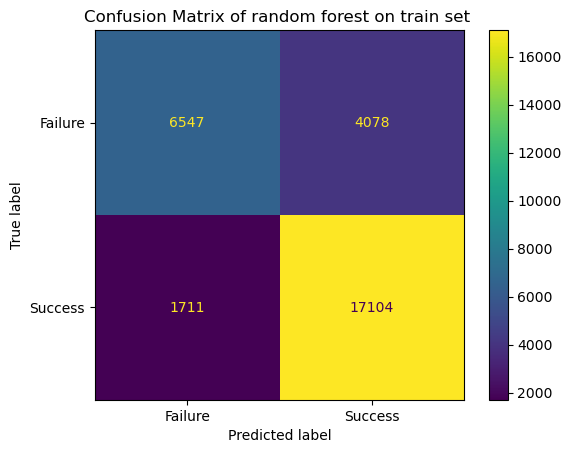

In [383]:
# confusion matrix of rf_best on train set
confusion_matrix=metrics.confusion_matrix(train_rf["Actual_Class"],train_rf["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of random forest on train set ")
plt.show()

In [384]:
# The accuracy score on rf_best
metrics.accuracy_score(train_rf["Actual_Class"],train_rf["Predicted_Class"])

0.8033627717391304

In [385]:
# using classification report let su check the performance of rf_best
print(metrics.classification_report(train_rf["Actual_Class"],train_rf["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69     10625
           1       0.81      0.91      0.86     18815

    accuracy                           0.80     29440
   macro avg       0.80      0.76      0.77     29440
weighted avg       0.80      0.80      0.80     29440



The Random Forest model "rf_best" achieves an accuracy of 79%, with an impressive recall/sensitivity score of 92% on the training set. Additionally, the AUC in the ROC curve reaches 0.83.
Now, let's evaluate the performance of both the logistic regression model (model 6) and the Random Forest model (rf_best) on the test set.

#Making Prediction on Test Set

In [386]:
# Probability Predictions on the test set using model6
y_test_pred_lr=result6.predict(X_test_sm)
y_test_pred_lr.shape

(12618,)

In [387]:
# Creating a dataframe with the Actual Conversion, Predicted Probability and Predicted Conversion on training set 
test_lr=pd.DataFrame()
test_lr["Predicted_Prob"]=y_test_pred_lr
test_lr["Actual_Class"]=y_test.values
test_lr["Predicted_Class"]=np.where(test_lr["Predicted_Prob"]>0.5,1,0)
test_lr.head()

,Predicted_Prob,Actual_Class,Predicted_Class
0,0.981740,1,1
1,0.739039,1,1
2,0.219044,0,0
3,0.430309,1,0
4,0.739039,0,1


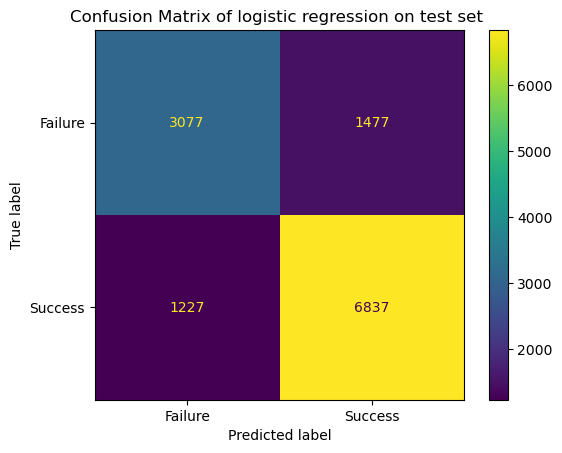

In [388]:
# confusion matrix on test data with model6
confusion_matrix=metrics.confusion_matrix(test_lr["Actual_Class"],test_lr["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of logistic regression on test set ")
plt.show()

In [389]:
# accuracy score on test set
metrics.accuracy_score(test_lr["Actual_Class"],test_lr["Predicted_Class"])

0.7857029640196544

In [390]:
# Summary of evaluation metrics on test set
print(metrics.classification_report(test_lr["Actual_Class"],test_lr["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69      4554
           1       0.82      0.85      0.83      8064

    accuracy                           0.79     12618
   macro avg       0.77      0.76      0.76     12618
weighted avg       0.78      0.79      0.78     12618



The sensitivity/recall score is 85% and accuracy is 79% and is very close to the test score

In [391]:
# We will make predictions on the test set using rf_best. Let us create a DataFrame of the test set with the cut off point of 0.38
y_test_pred_rf=rf_best.predict(X_test_scaled)
test_rf=pd.DataFrame()
test_rf["Predicted_Class"]=y_test_pred_rf
test_rf["Actual_Class"]=y_test.values
test_rf.head()

,Predicted_Class,Actual_Class
0,1,1
1,1,1
2,0,0
3,0,1
4,1,0


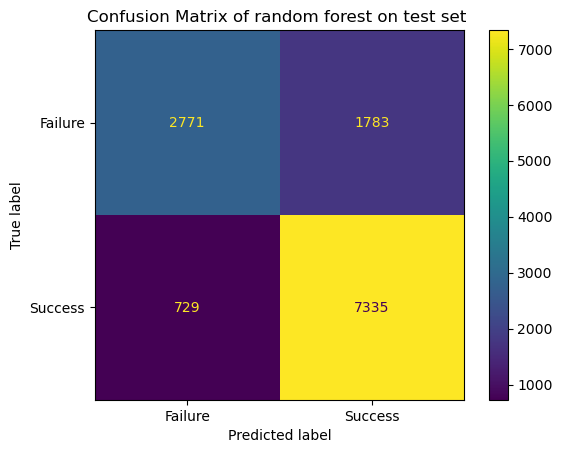

In [392]:
confusion_matrix=metrics.confusion_matrix(test_rf["Actual_Class"],test_rf["Predicted_Class"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["Failure","Success"])
cm_display.plot()
plt.title("Confusion Matrix of random forest on test set ")
plt.show()

In [393]:
# The accuracy of the test set is close to training set, hence it is a good model
metrics.accuracy_score(test_rf.Actual_Class,test_rf["Predicted_Class"])

0.8009193216040577

In [394]:
print(metrics.classification_report(test_rf["Actual_Class"],test_rf["Predicted_Class"]))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      4554
           1       0.80      0.91      0.85      8064

    accuracy                           0.80     12618
   macro avg       0.80      0.76      0.77     12618
weighted avg       0.80      0.80      0.79     12618



sensitivity/recall score on train and test data i. e 0.91.

Since Random Forest performance is better, we will use this model rf_best for deployment.

# Deployment on open invoices

In [395]:
# Let us check the number of records
openinv_data.shape

(88204, 14)

In [396]:
# Let us look at few records
openinv_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [397]:
openinv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [398]:
openinv_data.duplicated().sum()

0

In [399]:
openinv_data.isnull().sum()

AS_OF_DATE              0
Customer Type           0
Customer_Name           0
Customer Account No     3
Transaction Number      9
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [400]:
openinv_data.drop(["AS_OF_DATE","Customer Account No","Transaction Number"],axis=1,inplace=True)
openinv_data.shape

(88204, 11)

In [401]:
openinv_data.isnull().sum()

Customer Type           0
Customer_Name           0
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [402]:
openinv_data.describe()

,AGE
count,88204.000000
mean,183.430706
std,368.123334
min,-359.000000
25%,-17.000000
50%,47.000000
75%,242.000000
max,7343.000000


In [403]:
openinv_data=openinv_data[openinv_data["AGE"]<0]
openinv_data.shape

(28080, 11)

In [404]:
openinv_data.head()

,Customer Type,Customer_Name,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
2,Related Party,AL J Corp,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
4,Related Party,ALLI Corp,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30
5,Related Party,ALLI Corp,03/03/2022,30 Days from EOM,30/04/2022,AED,"1,264",INVOICE,-25,"1,264",3/3/2022 22:30
6,Related Party,ALLI Corp,15/03/2022,30 Days from EOM,30/04/2022,AED,"25,858",INVOICE,-25,"25,858",3/15/2022 19:06
7,Related Party,ALLI Corp,15/03/2022,30 Days from EOM,30/04/2022,AED,"39,873",INVOICE,-25,"39,873",3/15/2022 19:06


In [405]:
X_train_scaled.columns

Index(['USD Amount', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Immediate', 'PAYMENT_TERM_Others', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'INVOICE_CURRENCY_CODE_BHD',
       'INVOICE_CURRENCY_CODE_EUR', 'INVOICE_CURRENCY_CODE_GBP',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_KWD',
       'INVOICE_CURRENCY_CODE_QAR', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_USD', 'INVOICE_CURRENCY_CODE_ZAR', 'DUE_MONTH_2',
       'DUE_MONTH_3', 'DUE_MONTH_4', 'DUE_MONTH_5', 'DUE_MONTH_6',
       'DUE_MONTH_7', 'DUE_MONTH_8', 'DUE_MONTH_9', 'DUE_MONTH_10',
       'DUE_MONTH_11', 'DUE_MONTH_12', 'DUE_DAY_1', 'DUE_DAY_2', 'DUE_DAY_3',
       'DUE_D

In [406]:
openinv_data.drop(["Customer Type","Transaction Date","Local Amount","INV_CREATION_DATE"],axis=1,inplace=True)
openinv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,23/04/2022,USD,INVOICE,-18,"2,000"
4,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"3,800"
5,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"1,264"
6,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"25,858"
7,ALLI Corp,30 Days from EOM,30/04/2022,AED,INVOICE,-25,"39,873"


# Converting format for date column


In [407]:
openinv_data["Due Date"]=pd.to_datetime(openinv_data["Due Date"],format="%d/%m/%Y")
openinv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,"2,000"
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"3,800"
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"1,264"
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"25,858"
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,"39,873"


In [408]:
# USD Amount is in string format. Let us change the format
openinv_data["USD Amount"]=openinv_data["USD Amount"].apply(lambda x : x.replace(",",""))
openinv_data["USD Amount"]=openinv_data["USD Amount"].astype(int)

In [410]:
openinv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,25858
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,39873


In [411]:
openinv_data.describe()

,Due Date,AGE,USD Amount
count,28080,28080.000000,2.808000e+04
mean,2022-05-09 10:58:58.461538560,-34.457621,9.317022e+03
min,2022-04-06 00:00:00,-359.000000,-5.332270e+05
25%,2022-04-25 00:00:00,-55.000000,5.750000e+02
50%,2022-04-30 00:00:00,-25.000000,1.795000e+03
75%,2022-05-30 00:00:00,-20.000000,5.835250e+03
max,2023-03-30 00:00:00,-1.000000,5.978000e+06
std,NaN,21.659564,5.655069e+04


In [412]:
openinv_data[openinv_data["USD Amount"]<= 0]

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
1858,AHME Corp,Immediate,2022-05-01,SAR,PAYMENT,-26,-533227
1907,AL J Corp,Immediate,2022-05-17,SAR,PAYMENT,-42,-181596
2322,NAHR Corp,Immediate,2022-06-01,SAR,PAYMENT,-57,-266613
2517,RAWA Corp,60 Days from Inv Date,2022-05-01,SAR,INVOICE,-26,0
2579,SAYU Corp,60 Days from Inv Date,2022-04-06,SAR,INVOICE,-1,0
2615,SUHA Corp,Immediate,2022-06-15,SAR,PAYMENT,-71,-93315
7655,DAY Corp,Immediate,2022-04-10,AED,PAYMENT,-5,-1048
7656,DAY Corp,Immediate,2022-04-10,AED,PAYMENT,-5,-9162
8511,IHSA Corp,Immediate,2022-04-30,AED,PAYMENT,-25,-3049
11357,SLAS Corp,Immediate,2022-04-15,AED,PAYMENT,-10,-3790


In [413]:
openinv_data=openinv_data[openinv_data["USD Amount"]>0]
openinv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INVOICE,-18,2000
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,3800
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,1264
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,25858
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INVOICE,-25,39873


In [414]:
openinv_data["Transaction Class"].value_counts()

Transaction Class
INVOICE       27732
DEBIT NOTE      283
Name: count, dtype: int64

In [415]:
openinv_data["Transaction Class"]=openinv_data["Transaction Class"].apply(lambda x: x.replace("INVOICE","INV"))
openinv_data["Transaction Class"]=openinv_data["Transaction Class"].apply(lambda x: x.replace("DEBIT NOTE","DM"))

In [416]:
openinv_data["Transaction Class"].value_counts()

Transaction Class
INV    27732
DM       283
Name: count, dtype: int64

In [417]:
openinv_data["Payment Term"].unique()

array(['30 Days from Inv Date', '30 Days from EOM', '15 Days from EOM',
       '25 DAYS FROM EOM', '45 Days from Inv Date',
       '60 Days from Inv Date', '45 Days from EOM', '60 Days from EOM',
       'LC at 60 days', '75 Days from EOM', '90 Days from EOM',
       '90 Days from Inv Date', '120 Days from Inv Date',
       '75 Days from Inv Date', '70 days from Invoice Date',
       '45 DAYS + EOM', '15 Days from Inv Date', '120 Days from EOM',
       '365 DAYS FROM INVOICE DATE', '40 DAYS FROM EOM',
       '180 DAYS FROM INV DATE',
       '30% advance 70% after 60 days from invoice date',
       '50% ADV 50% 30 Days'], dtype=object)

In [418]:
rec_payment["PAYMENT_TERM"].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', '15 Days from EOM', 'Others',
       '60 Days from EOM', '60 Days from Inv Date',
       '45 Days from Inv Date', '90 Days from Inv Date',
       '90 Days from EOM'], dtype=object)

In [419]:
openinv_data["Payment Term"]=openinv_data["Payment Term"].replace(["Immediate Payment"],"Immediate")
openinv_data["Payment Term"]=openinv_data["Payment Term"].replace(["45 DAYS + EOM",],"45 Days from EOM")
value_to_keep

Index(['30 Days from EOM', '30 Days from Inv Date', 'Immediate',
       '60 Days from Inv Date', '60 Days from EOM', '15 Days from EOM',
       '45 Days from Inv Date', '90 Days from EOM', '45 Days from EOM',
       '90 Days from Inv Date', '100% Adv Payment'],
      dtype='object', name='PAYMENT_TERM')

In [420]:
openinv_data["Payment Term"]= openinv_data["Payment Term"].apply(lambda x: x if x in value_to_keep else "Others")

In [421]:
openinv_data["Payment Term"].value_counts()

Payment Term
60 Days from Inv Date    9781
60 Days from EOM         5693
30 Days from Inv Date    3057
30 Days from EOM         2628
Others                   2277
90 Days from EOM         1271
90 Days from Inv Date    1213
45 Days from EOM          752
45 Days from Inv Date     739
15 Days from EOM          604
Name: count, dtype: int64

In [422]:
openinv_data["DUE_MONTH"]=openinv_data["Due Date"].dt.month
openinv_data["DUE_DAY"]=openinv_data["Due Date"].dt.weekday
openinv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Currency,Transaction Class,AGE,USD Amount,DUE_MONTH,DUE_DAY
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5


In [423]:
openinv_data.rename(columns={"Customer_Name": "CUSTOMER_NAME","Payment Term":"PAYMENT_TERM",
                              "Transaction Class":"INVOICE_CLASS","Transaction Currency":"INVOICE_CURRENCY_CODE"
                             },inplace=True)
openinv_data.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY
2,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5
5,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5
6,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5
7,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5


In [424]:
openinv_data.shape

(28015, 9)

In [425]:
cust_dict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 3D D Corp to ZV F Corp
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CLUSTER_ID  689 non-null    int32
dtypes: int32(1)
memory usage: 24.2+ KB


In [426]:
merged_open_df=pd.merge(openinv_data,cust_dict, how="left",on="CUSTOMER_NAME")
merged_open_df.shape

(28015, 10)

In [430]:
merged_open_df.isnull().mean()*100

CUSTOMER_NAME            0.0
PAYMENT_TERM             0.0
Due Date                 0.0
INVOICE_CURRENCY_CODE    0.0
INVOICE_CLASS            0.0
AGE                      0.0
USD Amount               0.0
DUE_MONTH                0.0
DUE_DAY                  0.0
CLUSTER_ID               0.0
dtype: float64

In [428]:
merged_open_df.dropna(axis=0,inplace=True)
merged_open_df.shape

(27247, 10)

In [429]:
merged_open_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 0 to 28014
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CUSTOMER_NAME          27247 non-null  object        
 1   PAYMENT_TERM           27247 non-null  object        
 2   Due Date               27247 non-null  datetime64[ns]
 3   INVOICE_CURRENCY_CODE  27247 non-null  object        
 4   INVOICE_CLASS          27247 non-null  object        
 5   AGE                    27247 non-null  int64         
 6   USD Amount             27247 non-null  int32         
 7   DUE_MONTH              27247 non-null  int32         
 8   DUE_DAY                27247 non-null  int32         
 9   CLUSTER_ID             27247 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(4)
memory usage: 2.0+ MB


In [431]:
merged_open_df["CLUSTER_ID"]=merged_open_df["CLUSTER_ID"].astype(int)

In [432]:
dummy_open1=pd.get_dummies(merged_open_df[["PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE"]],drop_first=False)
dummy_open1.head()

,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [433]:
merged_open_df=pd.concat([merged_open_df,dummy_open1],axis=1)

In [434]:
dummy_open2=pd.get_dummies(merged_open_df["DUE_MONTH"],prefix="DUE_MONTH",drop_first=False)
dummy_open2.head()

,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12
0,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False


In [435]:
merged_open_df=pd.concat([merged_open_df,dummy_open2],axis=1)

In [436]:
dummy_open3=pd.get_dummies(merged_open_df["CLUSTER_ID"],prefix="CLUSTER_ID",drop_first=False)
dummy_open3.head()

,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [437]:
merged_open_df=pd.concat([merged_open_df,dummy_open3],axis=1)
merged_open_df.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


In [438]:
dummy_open4=pd.get_dummies(merged_open_df["DUE_DAY"],prefix="DUE_DAY",drop_first=False)
dummy_open4.head()

,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False


In [439]:
merged_open_df=pd.concat([merged_open_df,dummy_open4],axis=1)

In [440]:
feature_list=list(X_train_scaled.columns)
new=[]
for i in feature_list:
    if i not in merged_open_df.columns:
        merged_open_df[i]=merged_open_df[i].values[:]=0

merged_open_df.columns

Index(['CUSTOMER_NAME', 'PAYMENT_TERM', 'Due Date', 'INVOICE_CURRENCY_CODE',
       'INVOICE_CLASS', 'AGE', 'USD Amount', 'DUE_MONTH', 'DUE_DAY',
       'CLUSTER_ID', 'PAYMENT_TERM_15 Days from EOM',
       'PAYMENT_TERM_30 Days from EOM', 'PAYMENT_TERM_30 Days from Inv Date',
       'PAYMENT_TERM_45 Days from EOM', 'PAYMENT_TERM_45 Days from Inv Date',
       'PAYMENT_TERM_60 Days from EOM', 'PAYMENT_TERM_60 Days from Inv Date',
       'PAYMENT_TERM_90 Days from EOM', 'PAYMENT_TERM_90 Days from Inv Date',
       'PAYMENT_TERM_Others', 'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV',
       'INVOICE_CURRENCY_CODE_AED', 'INVOICE_CURRENCY_CODE_BHD',
       'INVOICE_CURRENCY_CODE_EGP', 'INVOICE_CURRENCY_CODE_EUR',
       'INVOICE_CURRENCY_CODE_GBP', 'INVOICE_CURRENCY_CODE_HKD',
       'INVOICE_CURRENCY_CODE_JOD', 'INVOICE_CURRENCY_CODE_KWD',
       'INVOICE_CURRENCY_CODE_OMR', 'INVOICE_CURRENCY_CODE_QAR',
       'INVOICE_CURRENCY_CODE_SAR', 'INVOICE_CURRENCY_CODE_SGD',
       'INVOICE_CURRENCY_CO

In [441]:
X_train_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.028754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000614,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.014069,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000655,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.103657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [442]:
merged_open_final=merged_open_df[X_train_scaled.columns]
merged_open_final.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,2000,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,False,True,False,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,3800,False,True,False,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,False,False,False,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,1264,False,True,False,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,False,False,False,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,25858,False,True,False,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,False,False,False,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,39873,False,True,False,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,False,False,False,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [443]:
merged_open_final_scaled=scaler.transform(merged_open_final)
merged_open_final_scaled=pd.DataFrame(merged_open_final_scaled,columns=merged_open_final.columns)
merged_open_final_scaled.head()

,USD Amount,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Immediate,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_2,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,CLUSTER_ID_1,CLUSTER_ID_2
0,0.000184,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.000116,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.002383,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.003675,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [444]:
y_open_invoices=rf_best.predict_proba(merged_open_final_scaled)[:,1]
y_open_invoices

array([0.72268637, 0.26739088, 0.28354992, ..., 0.69908661, 0.69908661,
       0.66149423])

In [445]:
merged_open_df["Prob_Pred_rf"]=y_open_invoices
merged_open_df.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,PAYMENT_TERM_Immediate,DUE_MONTH_2,Prob_Pred_rf
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.722686
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.267391
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.283550
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.218615
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.201889


In [446]:
merged_open_df["Final_Prediction"]=merged_open_df["Prob_Pred_rf"].apply(lambda x: 1 if x>0.5 else 0)
merged_open_df.head()

,CUSTOMER_NAME,PAYMENT_TERM,Due Date,INVOICE_CURRENCY_CODE,INVOICE_CLASS,AGE,USD Amount,DUE_MONTH,DUE_DAY,CLUSTER_ID,PAYMENT_TERM_15 Days from EOM,PAYMENT_TERM_30 Days from EOM,PAYMENT_TERM_30 Days from Inv Date,PAYMENT_TERM_45 Days from EOM,PAYMENT_TERM_45 Days from Inv Date,PAYMENT_TERM_60 Days from EOM,PAYMENT_TERM_60 Days from Inv Date,PAYMENT_TERM_90 Days from EOM,PAYMENT_TERM_90 Days from Inv Date,PAYMENT_TERM_Others,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EGP,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_HKD,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_OMR,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_SGD,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR,DUE_MONTH_3,DUE_MONTH_4,DUE_MONTH_5,DUE_MONTH_6,DUE_MONTH_7,DUE_MONTH_8,DUE_MONTH_9,DUE_MONTH_10,DUE_MONTH_11,DUE_MONTH_12,CLUSTER_ID_0,CLUSTER_ID_1,CLUSTER_ID_2,DUE_DAY_0,DUE_DAY_1,DUE_DAY_2,DUE_DAY_3,DUE_DAY_4,DUE_DAY_5,DUE_DAY_6,PAYMENT_TERM_Immediate,DUE_MONTH_2,Prob_Pred_rf,Final_Prediction
0,AL J Corp,30 Days from Inv Date,2022-04-23,USD,INV,-18,2000,4,5,1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.722686,1
1,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,3800,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.267391,0
2,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,1264,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.283550,0
3,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,25858,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.218615,0
4,ALLI Corp,30 Days from EOM,2022-04-30,AED,INV,-25,39873,4,5,1,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0.201889,0


# Insights on Data

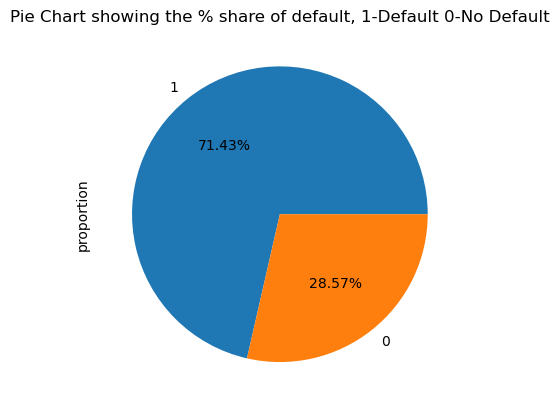

In [447]:
merged_open_df["Final_Prediction"].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.title("Pie Chart showing the % share of default, 1-Default 0-No Default")
plt.show()

In [448]:
merged_open_df.groupby("CUSTOMER_NAME")["Prob_Pred_rf"].mean().sort_values(ascending=False)

CUSTOMER_NAME
MAYC Corp    0.811963
IHSA Corp    0.795729
CUTE Corp    0.793524
HUCK Corp    0.786709
SAUD Corp    0.781207
               ...   
SOGE Corp    0.275131
MCT  Corp    0.273480
JUMB Corp    0.272206
J A  Corp    0.249517
ARMA Corp    0.249238
Name: Prob_Pred_rf, Length: 396, dtype: float64

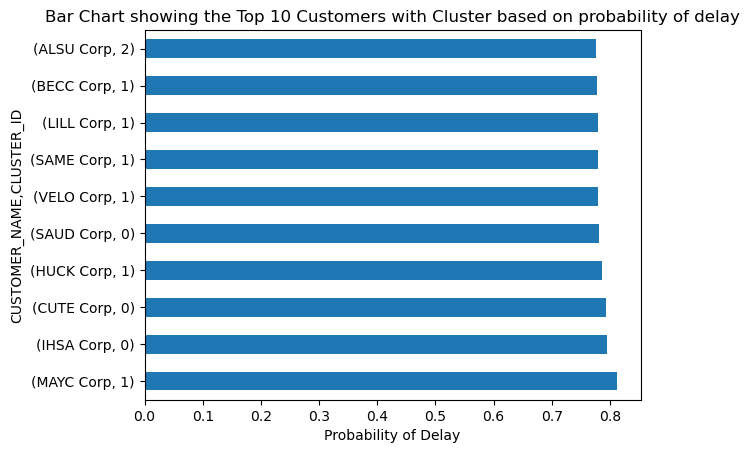

In [449]:
merged_open_df.groupby(["CUSTOMER_NAME","CLUSTER_ID"])["Prob_Pred_rf"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title("Bar Chart showing the Top 10 Customers with Cluster based on probability of delay")
plt.xlabel("Probability of Delay")
plt.show()

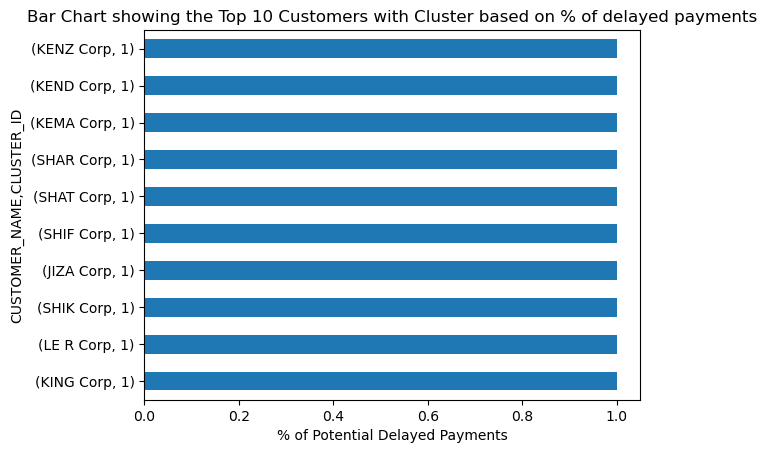

In [450]:
merged_open_df.groupby(["CUSTOMER_NAME","CLUSTER_ID"])["Final_Prediction"].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title("Bar Chart showing the Top 10 Customers with Cluster based on % of delayed payments")
plt.xlabel("% of Potential Delayed Payments")
plt.show()

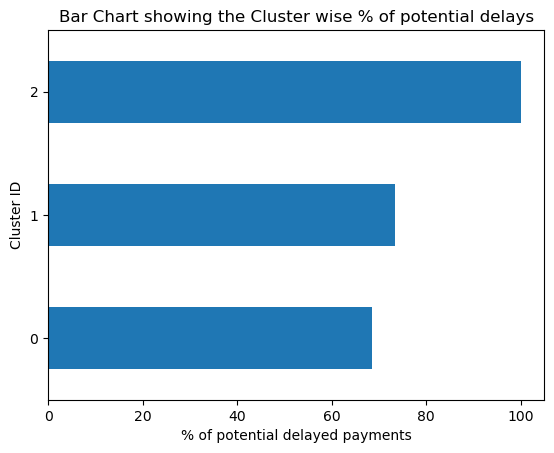

In [451]:
(merged_open_df.groupby(["CLUSTER_ID"])["Final_Prediction"].mean()*100).plot.barh()
plt.title("Bar Chart showing the Cluster wise % of potential delays")
plt.xlabel("% of potential delayed payments")
plt.ylabel("Cluster ID")
plt.show()

In [452]:
merged_open_df.groupby(["CLUSTER_ID"])["CUSTOMER_NAME"].nunique()

CLUSTER_ID
0     43
1    351
2      2
Name: CUSTOMER_NAME, dtype: int64

In [453]:
merged_open_df[merged_open_df["CLUSTER_ID"]==0].groupby("CUSTOMER_NAME")["Prob_Pred_rf"].mean()

CUSTOMER_NAME
AFRI Corp    0.695727
AL M Corp    0.757935
AL N Corp    0.680420
AL S Corp    0.614435
AL Y Corp    0.748166
APPA Corp    0.709652
CAIR Corp    0.709515
CITY Corp    0.699047
CUTE Corp    0.793524
DCLA Corp    0.443422
DEBE Corp    0.601372
DELH Corp    0.681710
DUBA Corp    0.706732
EBDA Corp    0.721741
FARM Corp    0.748464
FARO Corp    0.595179
FEND Corp    0.661850
FREN Corp    0.579178
FUN  Corp    0.664458
GALE Corp    0.513401
GOEL Corp    0.462793
HABC Corp    0.610473
IHSA Corp    0.795729
IL G Corp    0.731352
INGI Corp    0.612753
JASH Corp    0.708526
JAZI Corp    0.709319
LIFE Corp    0.634089
LOUI Corp    0.641427
LUXU Corp    0.656012
MABR Corp    0.689667
MAC  Corp    0.678091
MANS Corp    0.756513
ORFE Corp    0.691682
PARI Corp    0.750049
QATA Corp    0.709087
SAUD Corp    0.781207
SENS Corp    0.560064
SEPH Corp    0.652236
SONO Corp    0.449245
SUHA Corp    0.724287
VALE Corp    0.645998
VAVA Corp    0.702501
Name: Prob_Pred_rf, dtype: float64

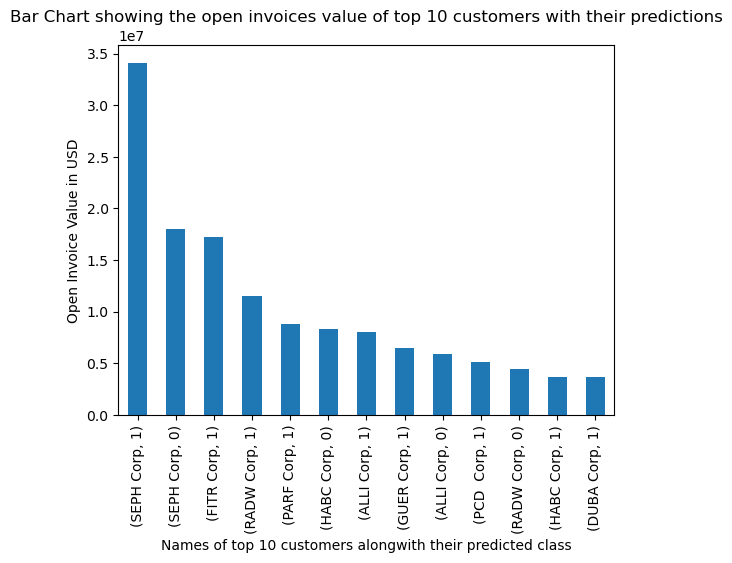

In [454]:
merged_open_df.groupby(["CUSTOMER_NAME","Final_Prediction"])["USD Amount"].sum().sort_values(ascending=False).head(13).plot.bar()
plt.title("Bar Chart showing the open invoices value of top 10 customers with their predictions")
plt.xlabel("Names of top 10 customers alongwith their predicted class")
plt.ylabel("Open Invoice Value in USD")
plt.show()    

In [455]:
open_inv_count=merged_open_df.groupby("CUSTOMER_NAME")["Final_Prediction"].count()
open_inv_count=open_inv_count.to_frame()
open_inv_count.rename(columns={"Final_Prediction":"Number of Open Invoices"},inplace=True)
open_inv_count.head()

,Number of Open Invoices
CUSTOMER_NAME,
3D D Corp,30
6TH Corp,2
ABDU Corp,77
ABEE Corp,2
ABU Corp,5


In [456]:
open_inv_delay=merged_open_df.groupby("CUSTOMER_NAME")["Final_Prediction"].mean()
open_inv_delay=open_inv_delay.to_frame()
open_inv_delay.rename(columns={"Final_Prediction":"% of Predicted Delayed Invoices"},inplace=True)
open_inv_delay.head()

,% of Predicted Delayed Invoices
CUSTOMER_NAME,
3D D Corp,0.000000
6TH Corp,1.000000
ABDU Corp,0.688312
ABEE Corp,1.000000
ABU Corp,0.800000


In [457]:
open_inv_customer=pd.merge(open_inv_count,open_inv_delay,how="inner",on="CUSTOMER_NAME")
open_inv_customer["Delayed Invoices Count"]=(open_inv_customer["Number of Open Invoices"]*open_inv_customer["% of Predicted Delayed Invoices"])
open_inv_customer.sort_values(by ="Delayed Invoices Count",ascending=False)

,Number of Open Invoices,% of Predicted Delayed Invoices,Delayed Invoices Count
CUSTOMER_NAME,,,
SEPH Corp,8260,0.667070,5510.0
FITR Corp,3454,0.866532,2993.0
PARF Corp,1717,0.845079,1451.0
AREE Corp,1117,0.482543,539.0
ALLI Corp,1042,0.435701,454.0
...,...,...,...
MIZZ Corp,1,0.000000,0.0
NABE Corp,2,0.000000,0.0
SARA Corp,2,0.000000,0.0


In [458]:
open_inv_customer.sort_values(by ="Delayed Invoices Count",ascending=False).head(10)

,Number of Open Invoices,% of Predicted Delayed Invoices,Delayed Invoices Count
CUSTOMER_NAME,,,
SEPH Corp,8260,0.667070,5510.0
FITR Corp,3454,0.866532,2993.0
PARF Corp,1717,0.845079,1451.0
AREE Corp,1117,0.482543,539.0
ALLI Corp,1042,0.435701,454.0
HABC Corp,517,0.686654,355.0
AL T Corp,584,0.578767,338.0
DEBE Corp,654,0.478593,313.0
CARR Corp,363,0.796143,289.0


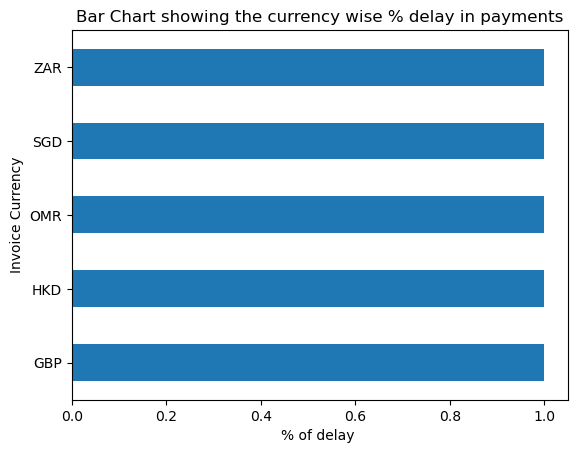

In [459]:
merged_open_df.groupby(["INVOICE_CURRENCY_CODE"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the currency wise % delay in payments")
plt.xlabel("% of delay ")
plt.ylabel("Invoice Currency")
plt.show()

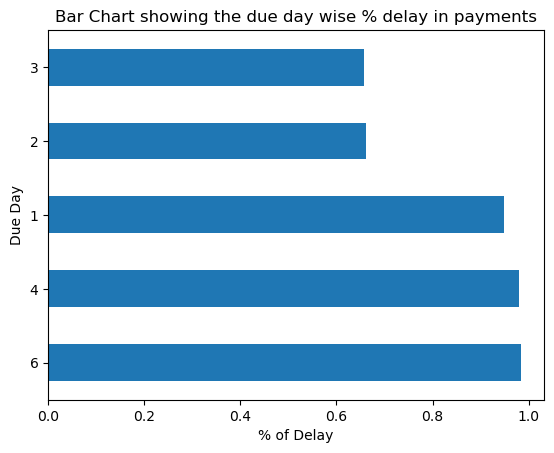

In [460]:
merged_open_df.groupby(["DUE_DAY"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the due day wise % delay in payments")
plt.xlabel("% of Delay")
plt.ylabel("Due Day")
plt.show()

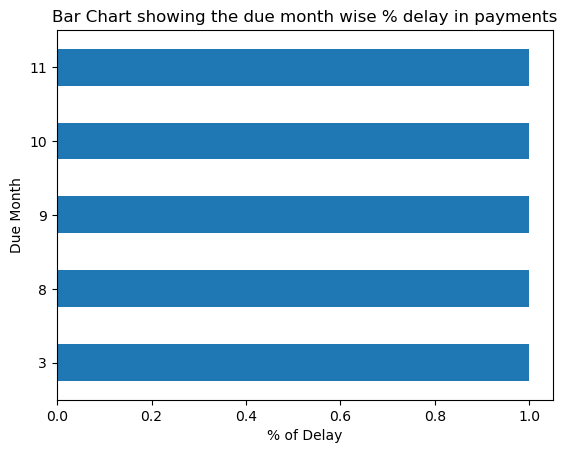

In [461]:
merged_open_df.groupby(["DUE_MONTH"])["Final_Prediction"].mean().sort_values(ascending=False).head().plot.barh()
plt.title("Bar Chart showing the due month wise % delay in payments")
plt.xlabel("% of Delay")
plt.ylabel("Due Month")
plt.show()